## ABOUT THE DATA

The data set related to speed dating. The dataset is acquired from Columbia University Department of Statistics. It has around 125 attributes and roughly around 8 thousand rows. This data was gathered from participants in experimental speed dating events from 2002-2004 during different time. During that the participants would have a four-minute "first date" with every other participant of the opposite gender. After four minutes the participants were asked if they would like to see their date again. There are different attributes like physical features, characteristics, demographics, dating habits and self-perception on which they give their rankings depedning on how important those attributes are to them. In this notebook we will find out which attribute is most influential to see if their date was a match.

The dataset can be found at the following link:
http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/

## ASSUMPTIONS 

- All the columns with boolean values will assumed as follwed 0 as FALSE and 1 as TRUE

Importing the libraries

In [2]:
library(dplyr)
library(tidyr)
library(stringr)
library(caTools)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(ROCR)
library(GGally)
library(car)
library(reshape2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.84 loaded


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
df <- read.csv("speeddating.csv", as.is=TRUE, header=TRUE)

In [4]:
head(df)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,⋯,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,b'',1,b'female',21,27,6,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',⋯,b'[0-3]',b'[3-5]',7,6,b'[6-8]',b'[5-6]',0,b'1',b'0',b'0'
2,b'',1,b'female',21,22,1,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',⋯,b'[0-3]',b'[3-5]',7,5,b'[6-8]',b'[5-6]',1,b'1',b'0',b'0'
3,b'',1,b'female',21,22,1,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',⋯,b'[0-3]',b'[3-5]',7,NA,b'[6-8]',b'[0-4]',1,b'1',b'1',b'1'
4,b'',1,b'female',21,23,2,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',⋯,b'[0-3]',b'[3-5]',7,6,b'[6-8]',b'[5-6]',0,b'1',b'1',b'1'
5,b'',1,b'female',21,24,3,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',⋯,b'[0-3]',b'[3-5]',6,6,b'[6-8]',b'[5-6]',0,b'1',b'1',b'1'
6,b'',1,b'female',21,25,4,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',⋯,b'[0-3]',b'[3-5]',6,5,b'[6-8]',b'[5-6]',0,b'0',b'1',b'0'


In [5]:
str(df)

'data.frame':	8378 obs. of  123 variables:
 $ has_null                       : chr  "b''" "b''" "b''" "b''" ...
 $ wave                           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ gender                         : chr  "b'female'" "b'female'" "b'female'" "b'female'" ...
 $ age                            : int  21 21 21 21 21 21 21 21 21 21 ...
 $ age_o                          : int  27 22 22 23 24 25 30 27 28 24 ...
 $ d_age                          : int  6 1 1 2 3 4 9 6 7 3 ...
 $ d_d_age                        : chr  "b'[4-6]'" "b'[0-1]'" "b'[0-1]'" "b'[2-3]'" ...
 $ race                           : chr  "b'Asian/Pacific Islander/Asian-American'" "b'Asian/Pacific Islander/Asian-American'" "b'Asian/Pacific Islander/Asian-American'" "b'Asian/Pacific Islander/Asian-American'" ...
 $ race_o                         : chr  "b'European/Caucasian-American'" "b'European/Caucasian-American'" "b'Asian/Pacific Islander/Asian-American'" "b'European/Caucasian-American'" ...
 $ samerace           

In [6]:
summary(df)

   has_null              wave          gender               age       
 Length:8378        Min.   : 1.00   Length:8378        Min.   :18.00  
 Class :character   1st Qu.: 7.00   Class :character   1st Qu.:24.00  
 Mode  :character   Median :11.00   Mode  :character   Median :26.00  
                    Mean   :11.35                      Mean   :26.36  
                    3rd Qu.:15.00                      3rd Qu.:28.00  
                    Max.   :21.00                      Max.   :55.00  
                                                       NA's   :95     
     age_o           d_age          d_d_age              race          
 Min.   :18.00   Min.   : 0.000   Length:8378        Length:8378       
 1st Qu.:24.00   1st Qu.: 1.000   Class :character   Class :character  
 Median :26.00   Median : 3.000   Mode  :character   Mode  :character  
 Mean   :26.36   Mean   : 4.186                                        
 3rd Qu.:28.00   3rd Qu.: 5.000                                        


In [7]:

remove_b <- function(x){
    
    if(grepl("^b'",x) || grepl("'$",x))
    { 
        x<- str_sub(x,3,-2)

    }
    
    return (x)
    }
    
df<-data.frame(lapply(df,remove_b))

In [8]:
head(df)

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,⋯,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,,1,female,21,27,6,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
2,,1,female,21,22,1,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,⋯,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
3,,1,female,21,22,1,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,⋯,[0-3],[3-5],7,NA,[6-8],[0-4],1,1,1,1
4,,1,female,21,23,2,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
5,,1,female,21,24,3,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,⋯,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1
6,,1,female,21,25,4,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,⋯,[0-3],[3-5],6,5,[6-8],[5-6],0,0,1,0


In [9]:
col_names=colnames(df)
col_names

[1] "has_null"                        "wave"                           
  [3] "gender"                          "age"                            
  [5] "age_o"                           "d_age"                          
  [7] "d_d_age"                         "race"                           
  [9] "race_o"                          "samerace"                       
 [11] "importance_same_race"            "importance_same_religion"       
 [13] "d_importance_same_race"          "d_importance_same_religion"     
 [15] "field"                           "pref_o_attractive"              
 [17] "pref_o_sincere"                  "pref_o_intelligence"            
 [19] "pref_o_funny"                    "pref_o_ambitious"               
 [21] "pref_o_shared_interests"         "d_pref_o_attractive"            
 [23] "d_pref_o_sincere"                "d_pref_o_intelligence"          
 [25] "d_pref_o_funny"                  "d_pref_o_ambitious"             
 [27] "d_pref_o_shared_interests"       "attractive_o"                   
 [29] "sinsere_o"                       "intelligence_o"                 
 [31] "funny_o"                         "ambitous_o"                     
 [33] "shared_interests_o"              "d_attractive_o"                 
 [35] "d_sinsere_o"                     "d_intelligence_o"               
 [37] "d_funny_o"                       "d_ambitous_o"                   
 [39] "d_shared_interests_o"            "attractive_important"           
 [41] "sincere_important"               "intellicence_important"         
 [43] "funny_important"                 "ambtition_important"            
 [45] "shared_interests_important"      "d_attractive_important"         
 [47] "d_sincere_important"             "d_intellicence_important"       
 [49] "d_funny_important"               "d_ambtition_important"          
 [51] "d_shared_interests_important"    "attractive"                     
 [53] "sincere"                         "intelligence"                   
 [55] "funny"                           "ambition"                       
 [57] "d_attractive"                    "d_sincere"                      
 [59] "d_intelligence"                  "d_funny"                        
 [61] "d_ambition"                      "attractive_partner"             
 [63] "sincere_partner"                 "intelligence_partner"           
 [65] "funny_partner"                   "ambition_partner"               
 [67] "shared_interests_partner"        "d_attractive_partner"           
 [69] "d_sincere_partner"               "d_intelligence_partner"         
 [71] "d_funny_partner"                 "d_ambition_partner"             
 [73] "d_shared_interests_partner"      "sports"                         
 [75] "tvsports"                        "exercise"                       
 [77] "dining"                          "museums"                        
 [79] "art"                             "hiking"                         
 [81] "gaming"                          "clubbing"                       
 [83] "reading"                         "tv"                             
 [85] "theater"                         "movies"                         
 [87] "concerts"                        "music"                          
 [89] "shopping"                        "yoga"                           
 [91] "d_sports"                        "d_tvsports"                     
 [93] "d_exercise"                      "d_dining"                       
 [95] "d_museums"                       "d_art"                          
 [97] "d_hiking"                        "d_gaming"                       
 [99] "d_clubbing"                      "d_reading"                      
[101] "d_tv"                            "d_theater"                      
[103] "d_movies"                        "d_concerts"                     
[105] "d_music"                         "d_shopping"                     
[107] "d_yoga"                          "interests_correlate"            
[109] 

In [10]:
unique_df<-lapply(df, unique)
unique_df

$has_null
[1] ""

$wave
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

$gender
[1] "female" "male"  

$age
 [1] 21 24 25 23 22 26 27 30 28 NA 29 34 35 32 39 20 19 18 37 33 36 31 42 38 55

$age_o
 [1] 27 22 23 24 25 30 28 21 26 29 NA 39 32 34 35 18 20 19 37 33 36 31 42 38 55

$d_age
 [1]  6  1  2  3  4  9  7  0  5  8 29 22 27 28 26 21 25 24 12 13 10 17 16 11 14
[26] 20 19 18 32 37 15 34 23 30 36

$d_d_age
[1] "[4-6]"  "[0-1]"  "[2-3]"  "[7-37]"

$race
[1] "Asian/Pacific Islander/Asian-American"
[2] "European/Caucasian-American"          
[3] "Other"                                
[4] "Latino/Hispanic American"             
[5] "Black/African American"               
[6] "?"                                    

$race_o
[1] "European/Caucasian-American"          
[2] "Asian/Pacific Islander/Asian-American"
[3] "Latino/Hispanic American"             
[4] "Other"                                
[5] "Black/African American"               
[6] "?"                                    

$samerace
[1] "0" "1"

$importance_same_race
 [1]  2  8  1  4  7  3  9 10 NA  5  6  0

$importance_same_religion
 [1]  4  5  1  3  2  8 10  6 NA  7  9

$d_importance_same_race
[1] "[2-5]"  "[6-10]" "[0-1]" 

$d_importance_same_religion
[1] "[2-5]"  "[0-1]"  "[6-10]"

$field
  [1] "Law"                                                     
  [2] "law"                                                     
  [3] "Economics"                                               
  [4] "Masters in Public Administration"                        
  [5] "Masters of Social Work&Education"                        
  [6] "Finance"                                                 
  [7] "Business"                                                
  [8] "political science"                                       
  [9] "money"                                                   
 [10] "Operations Research"                                     
 [11] "TC [Health Ed]"                                          
 [12] "Psychology"                                              
 [13] "social work"                                             
 [14] "Social Work"                                             
 [15] "Speech Language Pathology"                               
 [16] "Speech Languahe Pathology"                               
 [17] "Educational Psychology"                                  
 [18] "Applied Maths/Econs"                                     
 [19] "Mathematics"                                             
 [20] "Statistics"                                              
 [21] "Organizational Psychology"                               
 [22] "Mechanical Engineering"                                  
 [23] "Finanace"                                                
 [24] "Finance&Economics"                                       
 [25] "Undergrad - GS"                                          
 [26] "Mathematical Finance"                                    
 [27] "Medicine"                                                
 [28] "MBA"                                                     
 [29] "LAW"                                                     
 [30] "?"                                                       
 [31] "psychology"                                              
 [32] "German Literature"                                       
 [33] "Business & International Affairs"                        
 [34] "MFA Creative Writing"                                    
 [35] "Engineering"                                             
 [36] "Electrical Engineering"                                  
 [37] "Classics"                                                
 [38] "Operations Research [SEAS]"                              
 [39] "chemistry"                                               
 [40] "Journalism"                                              
 [41] "Elementary/Childhood Education [MA]"                     
 [42] "microbiology"                         

In [11]:
df<-subset(df, select = -c(has_null) )

In [12]:
head(df)

,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,⋯,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,female,21,27,6,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
2,1,female,21,22,1,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
3,1,female,21,22,1,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2,⋯,[0-3],[3-5],7,NA,[6-8],[0-4],1,1,1,1
4,1,female,21,23,2,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
5,1,female,21,24,3,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2,⋯,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1
6,1,female,21,25,4,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],6,5,[6-8],[5-6],0,0,1,0


In [13]:
df<-subset(df, select = -c(field) )

In [14]:
head(df)

,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,⋯,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,female,21,27,6,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
2,1,female,21,22,1,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
3,1,female,21,22,1,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2,⋯,[0-3],[3-5],7,NA,[6-8],[0-4],1,1,1,1
4,1,female,21,23,2,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
5,1,female,21,24,3,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2,⋯,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1
6,1,female,21,25,4,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],6,5,[6-8],[5-6],0,0,1,0


In [15]:
is_null<-data.frame(sort(sapply(df, function(x) sum(is.na(x))),decreasing = TRUE))
is_null

,sort.sapply.df..function.x..sum.is.na.x.....decreasing...TRUE.
,<int>
expected_num_interested_in_me,6578
expected_num_matches,1173
shared_interests_o,1076
shared_interests_partner,1067
ambitous_o,722
ambition_partner,712
met,375
funny_o,360
funny_partner,350


In [16]:
df<-subset(df, select = -c(expected_num_interested_in_me,expected_num_matches,shared_interests_o,shared_interests_partner) )

In [17]:
head(df)

,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,⋯,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,female,21,27,6,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
2,1,female,21,22,1,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
3,1,female,21,22,1,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,2,⋯,[0-3],[3-5],7,NA,[6-8],[0-4],1,1,1,1
4,1,female,21,23,2,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
5,1,female,21,24,3,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2,⋯,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1
6,1,female,21,25,4,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],6,5,[6-8],[5-6],0,0,1,0


In [18]:
is_null<-data.frame(sort(sapply(df, function(x) sum(is.na(x))),decreasing = TRUE))
is_null

,sort.sapply.df..function.x..sum.is.na.x.....decreasing...TRUE.
,<int>
ambitous_o,722
ambition_partner,712
met,375
funny_o,360
funny_partner,350
guess_prob_liked,309
intelligence_o,306
intelligence_partner,296
sinsere_o,287


In [19]:
df_new<-drop_na(df)
nrow(df_new)

[1] 6466

In [20]:

df<-df_new
head(df)
nrow(df)

,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,⋯,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,female,21,27,6,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
2,1,female,21,22,1,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
3,1,female,21,23,2,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,1,female,21,24,3,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2,⋯,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1
5,1,female,21,25,4,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],6,5,[6-8],[5-6],0,0,1,0
6,1,female,21,30,9,[7-37],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,⋯,[0-3],[3-5],6,5,[6-8],[5-6],0,1,0,0


[1] 6466

In [21]:
col_names=colnames(df)
col_names

[1] "wave"                            "gender"                         
  [3] "age"                             "age_o"                          
  [5] "d_age"                           "d_d_age"                        
  [7] "race"                            "race_o"                         
  [9] "samerace"                        "importance_same_race"           
 [11] "importance_same_religion"        "d_importance_same_race"         
 [13] "d_importance_same_religion"      "pref_o_attractive"              
 [15] "pref_o_sincere"                  "pref_o_intelligence"            
 [17] "pref_o_funny"                    "pref_o_ambitious"               
 [19] "pref_o_shared_interests"         "d_pref_o_attractive"            
 [21] "d_pref_o_sincere"                "d_pref_o_intelligence"          
 [23] "d_pref_o_funny"                  "d_pref_o_ambitious"             
 [25] "d_pref_o_shared_interests"       "attractive_o"                   
 [27] "sinsere_o"                       "intelligence_o"                 
 [29] "funny_o"                         "ambitous_o"                     
 [31] "d_attractive_o"                  "d_sinsere_o"                    
 [33] "d_intelligence_o"                "d_funny_o"                      
 [35] "d_ambitous_o"                    "d_shared_interests_o"           
 [37] "attractive_important"            "sincere_important"              
 [39] "intellicence_important"          "funny_important"                
 [41] "ambtition_important"             "shared_interests_important"     
 [43] "d_attractive_important"          "d_sincere_important"            
 [45] "d_intellicence_important"        "d_funny_important"              
 [47] "d_ambtition_important"           "d_shared_interests_important"   
 [49] "attractive"                      "sincere"                        
 [51] "intelligence"                    "funny"                          
 [53] "ambition"                        "d_attractive"                   
 [55] "d_sincere"                       "d_intelligence"                 
 [57] "d_funny"                         "d_ambition"                     
 [59] "attractive_partner"              "sincere_partner"                
 [61] "intelligence_partner"            "funny_partner"                  
 [63] "ambition_partner"                "d_attractive_partner"           
 [65] "d_sincere_partner"               "d_intelligence_partner"         
 [67] "d_funny_partner"                 "d_ambition_partner"             
 [69] "d_shared_interests_partner"      "sports"                         
 [71] "tvsports"                        "exercise"                       
 [73] "dining"                          "museums"                        
 [75] "art"                             "hiking"                         
 [77] "gaming"                          "clubbing"                       
 [79] "reading"                         "tv"                             
 [81] "theater"                         "movies"                         
 [83] "concerts"                        "music"                          
 [85] "shopping"                        "yoga"                           
 [87] "d_sports"                        "d_tvsports"                     
 [89] "d_exercise"                      "d_dining"                       
 [91] "d_museums"                       "d_art"                          
 [93] "d_hiking"                        "d_gaming"                       
 [95] "d_clubbing"                      "d_reading"                      
 [97] "d_tv"                            "d_theater"                      
 [99] "d_movies"                        "d_concerts"                     
[101] "d_music"                         "d_shopping"                     
[103] "d_yoga"                          "interests_correlate"            
[105] "d_interests_correlate"           "expected_happy_with_sd_people"  
[107] "d_expected_happy_with_sd_people" "d_expected_num_interested_in_me"
[109] 

In [22]:
df_new <- df %>% select(starts_with("d_"))
df_new


d_age,d_d_age,d_importance_same_race,d_importance_same_religion,d_pref_o_attractive,d_pref_o_sincere,d_pref_o_intelligence,d_pref_o_funny,d_pref_o_ambitious,d_pref_o_shared_interests,⋯,d_concerts,d_music,d_shopping,d_yoga,d_interests_correlate,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,d_like,d_guess_prob_liked
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
6,[4-6],[2-5],[2-5],[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],⋯,[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]
1,[0-1],[2-5],[2-5],[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],⋯,[9-10],[9-10],[6-8],[0-5],[0.33-1],[0-4],[0-3],[3-5],[6-8],[5-6]
2,[2-3],[2-5],[2-5],[21-100],[0-15],[0-15],[21-100],[0-15],[0-15],⋯,[9-10],[9-10],[6-8],[0-5],[0.33-1],[0-4],[0-3],[3-5],[6-8],[5-6]
3,[2-3],[2-5],[2-5],[21-100],[0-15],[16-20],[0-15],[0-15],[16-20],⋯,[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]
4,[4-6],[2-5],[2-5],[21-100],[0-15],[21-100],[0-15],[0-15],[0-15],⋯,[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[5-6]
9,[7-37],[2-5],[2-5],[21-100],[0-15],[21-100],[0-15],[0-15],[0-15],⋯,[9-10],[9-10],[6-8],[0-5],[0.33-1],[0-4],[0-3],[3-5],[6-8],[5-6]
7,[7-37],[2-5],[2-5],[21-100],[0-15],[21-100],[0-15],[0-15],[0-15],⋯,[9-10],[9-10],[6-8],[0-5],[0-0.33],[0-4],[0-3],[3-5],[6-8],[7-10]
3,[2-3],[2-5],[2-5],[21-100],[0-15],[0-15],[0-15],[0-15],[0-15],⋯,[9-10],[9-10],[6-8],[0-5],[-1-0],[0-4],[0-3],[3-5],[6-8],[5-6]
3,[2-3],[2-5],[2-5],[21-100],[16-20],[16-20],[16-20],[0-15],[0-15],⋯,[6-8],[6-8],[0-5],[0-5],[0-0.33],[0-4],[4-9],[3-5],[6-8],[0-4]


In [23]:
unique_df<-lapply(df_new, unique)
unique_df

$d_age
 [1]  6  1  2  3  4  9  7  0  5  8 12 10 13 14 11 18 15 17 19 20 16 22 28 32

$d_d_age
[1] "[4-6]"  "[0-1]"  "[2-3]"  "[7-37]"

$d_importance_same_race
[1] "[2-5]"  "[6-10]" "[0-1]" 

$d_importance_same_religion
[1] "[2-5]"  "[0-1]"  "[6-10]"

$d_pref_o_attractive
[1] "[21-100]" "[16-20]"  "[0-15]"  

$d_pref_o_sincere
[1] "[16-20]"  "[0-15]"   "[21-100]"

$d_pref_o_intelligence
[1] "[16-20]"  "[0-15]"   "[21-100]"

$d_pref_o_funny
[1] "[16-20]"  "[21-100]" "[0-15]"  

$d_pref_o_ambitious
[1] "[0-15]"   "[16-20]"  "[21-100]"

$d_pref_o_shared_interests
[1] "[0-15]"   "[16-20]"  "[21-100]"

$d_attractive_o
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_sinsere_o
[1] "[6-8]"  "[9-10]" "[0-5]" 

$d_intelligence_o
[1] "[6-8]"  "[9-10]" "[0-5]" 

$d_funny_o
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_ambitous_o
[1] "[6-8]"  "[9-10]" "[0-5]" 

$d_shared_interests_o
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_attractive_important
[1] "[0-15]"   "[21-100]" "[16-20]" 

$d_sincere_important
[1] "[16-20]"  "[0-15]"   "[21-100]"

$d_intellicence_important
[1] "[16-20]"  "[21-100]" "[0-15]"  

$d_funny_important
[1] "[0-15]"   "[16-20]"  "[21-100]"

$d_ambtition_important
[1] "[0-15]"   "[16-20]"  "[21-100]"

$d_shared_interests_important
[1] "[0-15]"   "[16-20]"  "[21-100]"

$d_attractive
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_sincere
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_intelligence
[1] "[6-8]"  "[9-10]" "[0-5]" 

$d_funny
[1] "[6-8]"  "[9-10]" "[0-5]" 

$d_ambition
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_attractive_partner
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_sincere_partner
[1] "[9-10]" "[6-8]"  "[0-5]" 

$d_intelligence_partner
[1] "[6-8]"  "[9-10]" "[0-5]" 

$d_funny_partner
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_ambition_partner
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_shared_interests_partner
[1] "[0-5]"  "[6-8]"  "[9-10]"

$d_sports
[1] "[9-10]" "[0-5]"  "[6-8]" 

$d_tvsports
[1] "[0-5]"  "[6-8]"  "[9-10]"

$d_exercise
[1] "[6-8]"  "[9-10]" "[0-5]" 

$d_dining
[1] "[9-10]" "[6-8]"  "[0-5]" 

$d_museums
[1] "[0-5]"  "[6-8]"  "[9-10]"

$d_art
[1] "[0-5]"  "[6-8]"  "[9-10]"

$d_hiking
[1] "[0-5]"  "[6-8]"  "[9-10]"

$d_gaming
[1] "[0-5]"  "[6-8]"  "[9-10]"

$d_clubbing
[1] "[0-5]"  "[6-8]"  "[9-10]"

$d_reading
[1] "[6-8]"  "[9-10]" "[0-5]" 

$d_tv
[1] "[9-10]" "[0-5]"  "[6-8]" 

$d_theater
[1] "[0-5]"  "[9-10]" "[6-8]" 

$d_movies
[1] "[9-10]" "[6-8]"  "[0-5]" 

$d_concerts
[1] "[9-10]" "[6-8]"  "[0-5]" 

$d_music
[1] "[9-10]" "[6-8]"  "[0-5]" 

$d_shopping
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_yoga
[1] "[0-5]"  "[6-8]"  "[9-10]"

$d_interests_correlate
[1] "[0-0.33]" "[0.33-1]" "[-1-0]"  

$d_expected_happy_with_sd_people
[1] "[0-4]"  "[7-10]" "[5-6]" 

$d_expected_num_interested_in_me
[1] "[0-3]"   "[4-9]"   "[10-20]"

$d_expected_num_matches
[1] "[3-5]"  "[0-2]"  "[5-18]"

$d_like
[1] "[6-8]"  "[0-5]"  "[9-10]"

$d_guess_prob_liked
[1] "[5-6]"  "[7-10]" "[0-4]"

In [24]:
df <- df %>% select(-starts_with("d_"))

In [25]:
head(df)

,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,⋯,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
1,1,female,21,27,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,35,⋯,8,1,0.14,3,7,6,0,1,0,0
2,1,female,21,22,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,60,⋯,8,1,0.54,3,7,5,1,1,0,0
3,1,female,21,23,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,30,⋯,8,1,0.61,3,7,6,0,1,1,1
4,1,female,21,24,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2,4,30,⋯,8,1,0.21,3,6,6,0,1,1,1
5,1,female,21,25,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,50,⋯,8,1,0.25,3,6,5,0,0,1,0
6,1,female,21,30,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,35,⋯,8,1,0.34,3,6,5,0,1,0,0


In [26]:
str(df)

'data.frame':	6466 obs. of  61 variables:
 $ wave                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ gender                       : chr  "female" "female" "female" "female" ...
 $ age                          : int  21 21 21 21 21 21 21 21 24 24 ...
 $ age_o                        : int  27 22 23 24 25 30 28 24 27 22 ...
 $ race                         : chr  "Asian/Pacific Islander/Asian-American" "Asian/Pacific Islander/Asian-American" "Asian/Pacific Islander/Asian-American" "Asian/Pacific Islander/Asian-American" ...
 $ race_o                       : chr  "European/Caucasian-American" "European/Caucasian-American" "European/Caucasian-American" "Latino/Hispanic American" ...
 $ samerace                     : chr  "0" "0" "0" "0" ...
 $ importance_same_race         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ importance_same_religion     : int  4 4 4 4 4 4 4 4 5 5 ...
 $ pref_o_attractive            : num  35 60 30 30 50 35 50 100 35 60 ...
 $ pref_o_sincere               : num  20 0 5 10

In [27]:
unique_df<-lapply(df, unique)
unique_df

$wave
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21

$gender
[1] "female" "male"  

$age
 [1] 21 24 25 23 22 26 27 30 28 29 34 35 32 20 19 18 37 33 36 31 42 38 55

$age_o
 [1] 27 22 23 24 25 30 28 21 26 29 32 34 35 18 19 20 37 33 31 36 42 38 55

$race
[1] "Asian/Pacific Islander/Asian-American"
[2] "European/Caucasian-American"          
[3] "Other"                                
[4] "Latino/Hispanic American"             
[5] "Black/African American"               

$race_o
[1] "European/Caucasian-American"          
[2] "Latino/Hispanic American"             
[3] "Asian/Pacific Islander/Asian-American"
[4] "Other"                                
[5] "Black/African American"               

$samerace
[1] "0" "1"

$importance_same_race
 [1]  2  8  1  4  7  3  9 10  5  6  0

$importance_same_religion
 [1]  4  5  1  3  2  8 10  6  7  9

$pref_o_attractive
 [1]  35.00  60.00  30.00  50.00 100.00  19.00  33.33  15.00  45.00  20.00
[11]  10.00   9.09  25.00  40.00  12.00  17.00  21.00   5.00  18.00  14.00
[21]  17.39  18.60  20.83  18.75  16.67  12.77   6.67  19.05  16.00  15.22
[31]  11.11  17.78  16.28  19.57  18.37  15.91  20.51  27.78  14.29   8.33
[41]  11.36  15.09   8.51  14.55  15.38   9.76  18.18  16.98  15.56  20.45
[51]  20.93  19.44   9.52  12.24  13.04  19.15  16.07  17.02  14.89   7.50
[61]  21.28  17.24  14.71  25.64  13.51  21.43  23.81  17.65  17.50  13.21
[71]  19.61  14.58  17.31  11.54  16.36  15.52  22.00  90.00  24.00  27.00
[81]  23.00   0.00   7.00  31.58  75.00   9.00  70.00  95.00   8.00  55.00
[91]  28.00  58.00

$pref_o_sincere
 [1] 20.00  0.00  5.00 10.00 15.00 18.00 11.11 25.00 18.18 35.00 23.00 22.00
[13] 17.00 30.00  7.00 24.00  8.00 32.00 21.00  3.00 40.00 17.39 16.28 20.83
[25] 16.67 19.15 19.05 18.75 15.22 12.50 13.95 17.78 20.93 10.87 18.37 20.45
[37] 23.08 19.44 14.29 16.00 16.98 16.36 17.31 18.87 16.33 19.51 15.09 19.57
[49] 23.81 20.41 21.74 21.28 19.23 17.86 22.50 17.50 17.02  5.13 17.24 14.71
[61] 17.95 18.92 17.65 15.69 13.46 15.56 19.00  2.00 14.00 13.00 47.00 12.00
[73] 14.53 10.53  1.00 26.00

$pref_o_intelligence
 [1] 20.00  0.00 15.00 30.00 25.00 19.00 11.11 35.00 27.27 10.00 40.00 18.00
[13] 23.00 50.00 22.00 45.00 17.00 21.00  5.00 15.22 18.60 16.67 18.75 17.02
[25] 19.05 19.57 20.83 17.78 22.22 20.41 20.45 20.51 19.44 21.43 16.00 22.73
[37] 16.98 19.15 18.18 17.31 18.87 16.33 19.51 23.26 19.23 17.86 17.50 17.39
[49] 21.28 23.08 23.81 17.24 14.71 15.38 21.62 17.65 18.37  2.00 28.00 42.86
[61] 24.79 15.79 27.00  1.00  8.00

$pref_o_funny
 [1] 20.00 40.00 10.00  0.00 18.00 11.11 15.00 25.00 18.18 30.00 16.00 22.00
[13] 17.00 19.00 23.00 12.00  5.00 24.00 35.00 17.39 18.60 16.67 20.83 17.02
[25] 17.78 19.05 18.75 16.28 15.56 19.57 20.41 20.45 17.95 27.78 21.43 14.58
[37] 18.87 19.15 14.00 17.31 16.98 18.37 14.63 14.29 19.23 17.86 22.50 21.28
[49] 12.77 12.82 17.24 14.71 20.51 13.51 23.81 23.26 15.69 12.50 16.33  2.00
[61]  9.52  8.00 17.09 21.05 50.00 27.00  3.00  1.00 45.00 13.00

$pref_o_ambitious
 [1]  0.00  5.00 10.00 14.00 11.11 15.00 18.18 16.00 20.00 25.00  7.00 53.00
[13]  8.00 17.00 13.00  6.00 11.00  2.00 18.00 12.00 13.04  6.67 11.63  6.25
[25] 12.50 16.67 14.89  9.52 18.75 16.28 17.78 15.56 13.95 19.57 16.33 11.36
[37]  2.56  2.78 19.05 18.87 19.15 16.36 17.31 16.98 18.37 19.51 13.64 13.33
[49] 15.22 20.41 12.77 13.46 17.86  6.38 17.95 14.81  4.76 10.87 13.79 20.59
[61] 10.26 13.51 11.90  2.38  2.33 15.69  9.62 15.38 17.65 11.54 19.23 17.24
[73] 19.00  4.00 14.29  3.00  5.98 10.53 30.00  1.00  9.00

$pref_o_shared_interests
 [1]  5.00  0.00 20.00 10.00 15.00 12.00 22.22  9.09 18.00 13.00 14.00 30.00
[13] 25.00  8.00 22.00  6.00  2.00 19.57 13.33 16.28 18.75 12.50 16.67 19.15
[25] 15.56 14.29 16.00  8.33 17.78 11.63 10.87  6.67  6.12 11.36 15.38  2.78
[37]  9.52 18.18 13.21 14.89 16.36 16.33 17.07 13.64 15.09 11.11  2.27 13.04
[49] 12.77 17.31 11.54  7.50 17.39  8.51 10.64 21.28 20.51 18.52 23.81 15.22
[61] 17.24 20.59 10.26 18.92 11.90  2.38 13.46 15.6

In [28]:
df$gender[df$gender == "female"] <- 1
df$gender[df$gender == "male"] <- 0

In [29]:
names(df)[names(df) == "gender"] <- "female"

In [30]:
head(df)

,wave,female,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,⋯,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
1,1,1,21,27,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,35,⋯,8,1,0.14,3,7,6,0,1,0,0
2,1,1,21,22,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,60,⋯,8,1,0.54,3,7,5,1,1,0,0
3,1,1,21,23,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,30,⋯,8,1,0.61,3,7,6,0,1,1,1
4,1,1,21,24,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2,4,30,⋯,8,1,0.21,3,6,6,0,1,1,1
5,1,1,21,25,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,50,⋯,8,1,0.25,3,6,5,0,0,1,0
6,1,1,21,30,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,35,⋯,8,1,0.34,3,6,5,0,1,0,0


In [31]:
df$met[df$met == "3" || df$met == "7" |df$met == "8"] <- 0


In [32]:
head(df)

,wave,female,age,age_o,race,race_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,⋯,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match
,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,1,21,27,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,35,⋯,8,1,0.14,3,7,6,0,1,0,0
2,1,1,21,22,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,60,⋯,8,1,0.54,3,7,5,1,1,0,0
3,1,1,21,23,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,30,⋯,8,1,0.61,3,7,6,0,1,1,1
4,1,1,21,24,Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,2,4,30,⋯,8,1,0.21,3,6,6,0,1,1,1
5,1,1,21,25,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,50,⋯,8,1,0.25,3,6,5,0,0,1,0
6,1,1,21,30,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,2,4,35,⋯,8,1,0.34,3,6,5,0,1,0,0


In [33]:
df<-subset(df, select = -c(race,race_o) )

In [34]:
head(df)

,wave,female,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,⋯,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match
,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,1,21,27,0,2,4,35,20,20,⋯,8,1,0.14,3,7,6,0,1,0,0
2,1,1,21,22,0,2,4,60,0,0,⋯,8,1,0.54,3,7,5,1,1,0,0
3,1,1,21,23,0,2,4,30,5,15,⋯,8,1,0.61,3,7,6,0,1,1,1
4,1,1,21,24,0,2,4,30,10,20,⋯,8,1,0.21,3,6,6,0,1,1,1
5,1,1,21,25,0,2,4,50,0,30,⋯,8,1,0.25,3,6,5,0,0,1,0
6,1,1,21,30,0,2,4,35,15,25,⋯,8,1,0.34,3,6,5,0,1,0,0


In [35]:
str(df)

'data.frame':	6466 obs. of  59 variables:
 $ wave                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ female                       : chr  "1" "1" "1" "1" ...
 $ age                          : int  21 21 21 21 21 21 21 21 24 24 ...
 $ age_o                        : int  27 22 23 24 25 30 28 24 27 22 ...
 $ samerace                     : chr  "0" "0" "0" "0" ...
 $ importance_same_race         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ importance_same_religion     : int  4 4 4 4 4 4 4 4 5 5 ...
 $ pref_o_attractive            : num  35 60 30 30 50 35 50 100 35 60 ...
 $ pref_o_sincere               : num  20 0 5 10 0 15 0 0 20 0 ...
 $ pref_o_intelligence          : num  20 0 15 20 30 25 25 0 20 0 ...
 $ pref_o_funny                 : num  20 40 40 10 10 10 10 0 20 40 ...
 $ pref_o_ambitious             : num  0 0 5 10 0 5 0 0 0 0 ...
 $ pref_o_shared_interests      : num  5 0 5 20 10 10 15 0 5 0 ...
 $ attractive_o                 : num  6 7 7 8 7 3 7 6 8 7 ...
 $ sinsere_o                

In [36]:
for (col in colnames(df)) {
  if (is.character(df[[col]])) {  
    df[[col]] <- as.integer(df[[col]]) 
  }
}

In [37]:
str(df)

'data.frame':	6466 obs. of  59 variables:
 $ wave                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ female                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ age                          : int  21 21 21 21 21 21 21 21 24 24 ...
 $ age_o                        : int  27 22 23 24 25 30 28 24 27 22 ...
 $ samerace                     : int  0 0 0 0 0 0 0 0 1 1 ...
 $ importance_same_race         : int  2 2 2 2 2 2 2 2 2 2 ...
 $ importance_same_religion     : int  4 4 4 4 4 4 4 4 5 5 ...
 $ pref_o_attractive            : num  35 60 30 30 50 35 50 100 35 60 ...
 $ pref_o_sincere               : num  20 0 5 10 0 15 0 0 20 0 ...
 $ pref_o_intelligence          : num  20 0 15 20 30 25 25 0 20 0 ...
 $ pref_o_funny                 : num  20 40 40 10 10 10 10 0 20 40 ...
 $ pref_o_ambitious             : num  0 0 5 10 0 5 0 0 0 0 ...
 $ pref_o_shared_interests      : num  5 0 5 20 10 10 15 0 5 0 ...
 $ attractive_o                 : num  6 7 7 8 7 3 7 6 8 7 ...
 $ sinsere_o        

In [38]:
summary(df)

      wave          female            age            age_o      
 Min.   : 1.0   Min.   :0.0000   Min.   :18.00   Min.   :18.00  
 1st Qu.: 7.0   1st Qu.:0.0000   1st Qu.:24.00   1st Qu.:24.00  
 Median :11.0   Median :1.0000   Median :26.00   Median :26.00  
 Mean   :11.3   Mean   :0.5003   Mean   :26.27   Mean   :26.28  
 3rd Qu.:15.0   3rd Qu.:1.0000   3rd Qu.:28.00   3rd Qu.:28.00  
 Max.   :21.0   Max.   :1.0000   Max.   :55.00   Max.   :55.00  
    samerace      importance_same_race importance_same_religion
 Min.   :0.0000   Min.   : 0.00        Min.   : 1.000          
 1st Qu.:0.0000   1st Qu.: 1.00        1st Qu.: 1.000          
 Median :0.0000   Median : 3.00        Median : 3.000          
 Mean   :0.3945   Mean   : 3.82        Mean   : 3.662          
 3rd Qu.:1.0000   3rd Qu.: 6.00        3rd Qu.: 6.000          
 Max.   :1.0000   Max.   :10.00        Max.   :10.000          
 pref_o_attractive pref_o_sincere  pref_o_intelligence  pref_o_funny  
 Min.   :  0.00    Min.   

## 2. Exploratory Data Analysis 

Have your multiple code and markdown cells here to explore the data. Univariate, multivariate, histograms, correlations, scatter plots, missing values, etc. 


In [39]:
# codes and comments 

# have a markdown cell after every major step to explain what you did and what you learned. 


In [40]:
head(df)

,wave,female,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,⋯,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,1,21,27,0,2,4,35,20,20,⋯,8,1,0.14,3,7,6,0,1,0,0
2,1,1,21,22,0,2,4,60,0,0,⋯,8,1,0.54,3,7,5,1,1,0,0
3,1,1,21,23,0,2,4,30,5,15,⋯,8,1,0.61,3,7,6,0,1,1,1
4,1,1,21,24,0,2,4,30,10,20,⋯,8,1,0.21,3,6,6,0,1,1,1
5,1,1,21,25,0,2,4,50,0,30,⋯,8,1,0.25,3,6,5,0,0,1,0
6,1,1,21,30,0,2,4,35,15,25,⋯,8,1,0.34,3,6,5,0,1,0,0


In [41]:
nrow(df)

[1] 6466

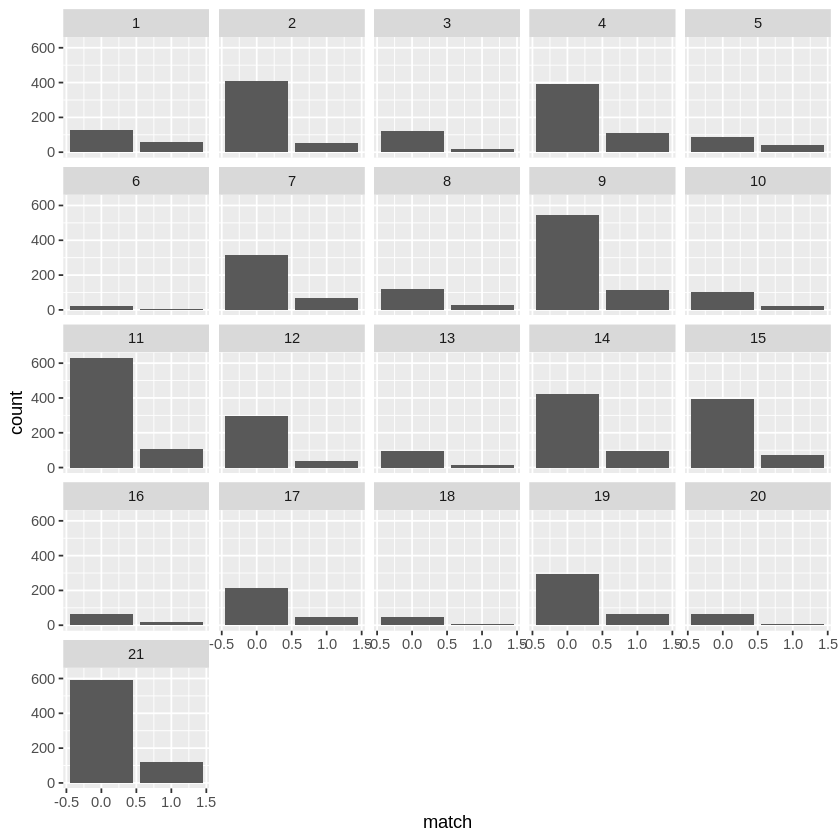

In [42]:
ggplot(df, aes(x = match )) +
  geom_bar() +facet_wrap(~wave)

# Chi-Square Test

In [43]:
table(df$importance_same_race, df$match)

    
        0    1
  0     5    1
  1  1703  420
  2   620  130
  3   669  143
  4   291   64
  5   432   81
  6   367   70
  7   360   56
  8   479   58
  9   279   68
  10  148   22

In [44]:
test1 <- chisq.test(table(df$importance_same_race, df$match))
test1

Warning message in chisq.test(table(df$importance_same_race, df$match)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(df$importance_same_race, df$match)
X-squared = 34.438, df = 10, p-value = 0.0001557


In [45]:
test1f <- fisher.test(table(df$importance_same_race, df$match),simulate.p.value=TRUE)
test1f


	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  table(df$importance_same_race, df$match)
p-value = 0.0004998
alternative hypothesis: two.sided


In [46]:
table(df$importance_same_religion, df$match)

    
        0    1
  1  1931  451
  2   550  100
  3   619  122
  4   310   74
  5   464   76
  6   433   93
  7   266   60
  8   336   83
  9   209   26
  10  235   28

In [47]:
test2<- chisq.test(table(df$importance_same_religion, df$match))
test2


	Pearson's Chi-squared test

data:  table(df$importance_same_religion, df$match)
X-squared = 28.221, df = 9, p-value = 0.0008759


In [48]:
table(df$funny_o, df$match)

     
         0    1
  0      9    0
  1     75    1
  2    160    5
  3    218    5
  4    472   18
  5    879   62
  5.5    1    0
  6   1091  144
  6.5    1    1
  7   1095  260
  7.5    1    0
  8    833  322
  8.5    1    0
  9    319  174
  9.5    1    0
  10   196  121
  11     1    0

In [49]:
test3<- chisq.test(table(df$funny_o, df$match))
test3

Warning message in chisq.test(table(df$funny_o, df$match)):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table(df$funny_o, df$match)
X-squared = 547.28, df = 16, p-value < 2.2e-16


In [50]:
test3f <- fisher.test(table(df$funny_o, df$match),simulate.p.value=TRUE)
test3f


	Fisher's Exact Test for Count Data with simulated p-value (based on
	2000 replicates)

data:  table(df$funny_o, df$match)
p-value = 0.0004998
alternative hypothesis: two.sided


# PRINCIPLE COMPONENT ANALYSIS PCA

In [51]:
df_scaled <- scale(df[!sapply(df,class) %in% c('factor')])

In [52]:
cbind(df, df_scaled)

,wave,female,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,⋯,shopping,yoga,interests_correlate,expected_happy_with_sd_people,like,guess_prob_liked,met,decision,decision_o,match
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,21,27,0,2,4,35.00,20.00,20.00,⋯,0.869023,-1.2377325,-0.18929718,-1.4466450,0.46803880,0.3453757,-0.203196,1.1445122,-0.8714002,-0.4559481
2,1,1,21,22,0,2,4,60.00,0.00,0.00,⋯,0.869023,-1.2377325,1.12718097,-1.4466450,0.46803880,-0.1277597,3.814741,1.1445122,-0.8714002,-0.4559481
3,1,1,21,23,0,2,4,30.00,5.00,15.00,⋯,0.869023,-1.2377325,1.35756464,-1.4466450,0.46803880,0.3453757,-0.203196,1.1445122,1.1474009,2.1928931
4,1,1,21,24,0,2,4,30.00,10.00,20.00,⋯,0.869023,-1.2377325,0.04108650,-1.4466450,-0.08357866,0.3453757,-0.203196,1.1445122,1.1474009,2.1928931
5,1,1,21,25,0,2,4,50.00,0.00,30.00,⋯,0.869023,-1.2377325,0.17273431,-1.4466450,-0.08357866,-0.1277597,-0.203196,-0.8735996,1.1474009,-0.4559481
6,1,1,21,30,0,2,4,35.00,15.00,25.00,⋯,0.869023,-1.2377325,0.46894189,-1.4466450,-0.08357866,-0.1277597,-0.203196,1.1445122,-0.8714002,-0.4559481
7,1,1,21,28,0,2,4,50.00,0.00,25.00,⋯,0.869023,-1.2377325,0.27147017,-1.4466450,0.46803880,0.8185111,-0.203196,1.1445122,1.1474009,2.1928931
8,1,1,21,24,0,2,4,100.00,0.00,0.00,⋯,0.869023,-1.2377325,-1.83489486,-1.4466450,-0.08357866,0.3453757,-0.203196,1.1445122,-0.8714002,-0.4559481
9,1,1,24,27,1,2,5,35.00,20.00,20.00,⋯,-1.045492,-1.2377325,0.30438213,-0.8724978,-0.08357866,-0.6008951,-0.203196,-0.8735996,-0.8714002,-0.4559481


Importance of components:
                           Comp.1     Comp.2     Comp.3     Comp.4    Comp.5
Standard deviation     2.27654348 2.07727172 1.75804551 1.73660813 1.5672354
Proportion of Variance 0.08785512 0.07314789 0.05239326 0.05112329 0.0416374
Cumulative Proportion  0.08785512 0.16100300 0.21339626 0.26451955 0.3061570
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.44199460 1.42160791 1.30641397 1.24536475 1.22072678
Proportion of Variance 0.03524864 0.03425901 0.02893189 0.02629107 0.02526109
Cumulative Proportion  0.34140560 0.37566461 0.40459650 0.43088757 0.45614866
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     1.18865629 1.14500094 1.13520406 1.11277278 1.10629422
Proportion of Variance 0.02395123 0.02222424 0.02184555 0.02099076 0.02074705
Cumulative Proportion  0.48009988 0.50232412 0.52416967 0.54516043 0.56590749
                          Comp.16    Comp.

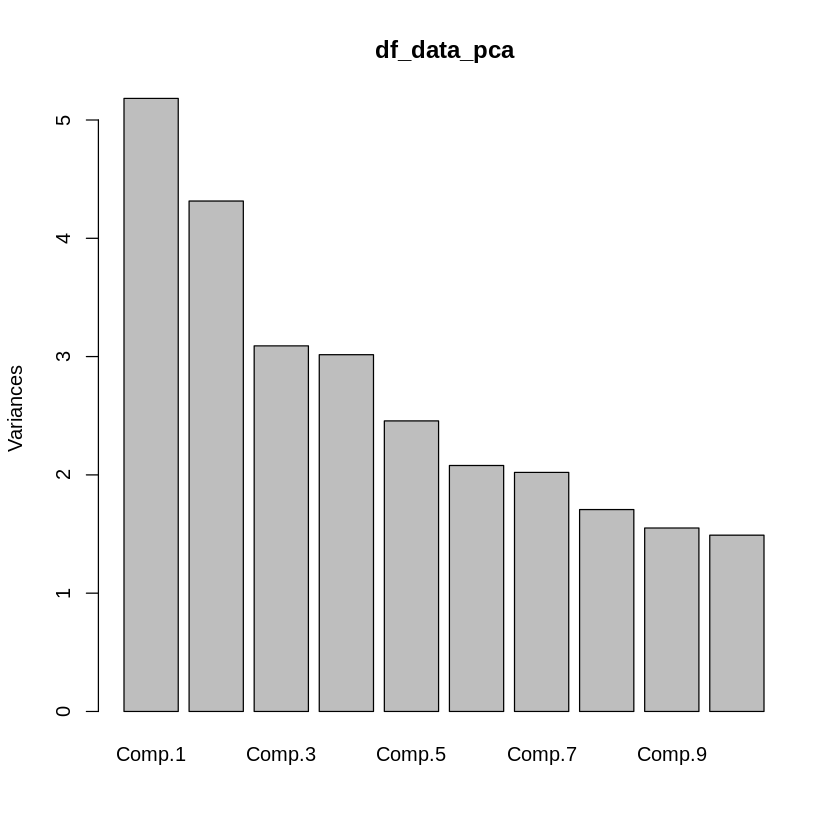

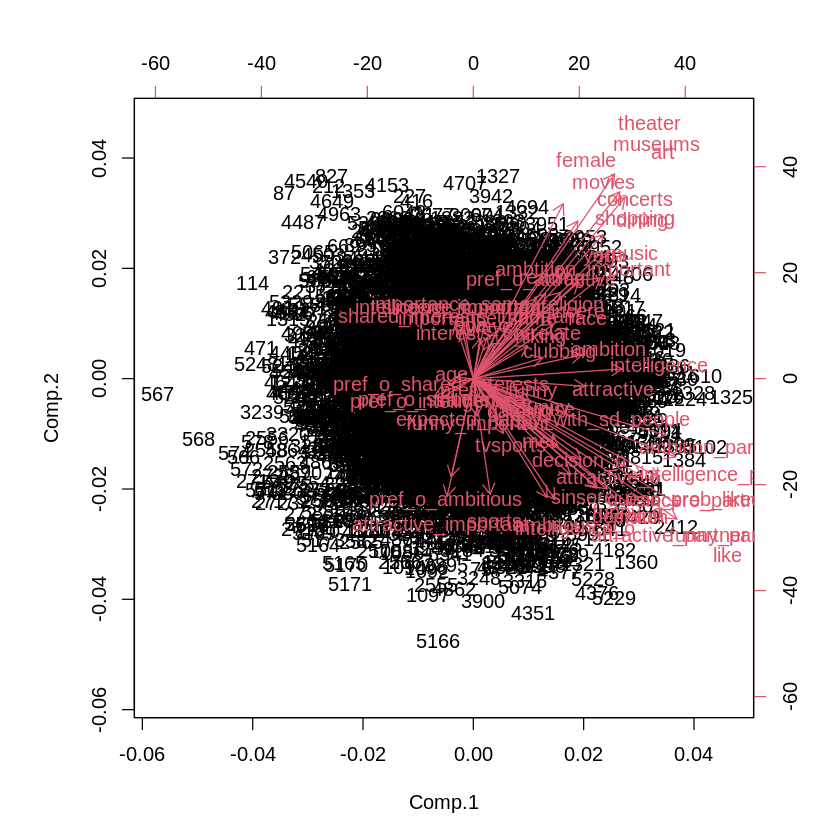

In [53]:
df_data <- as.data.frame(scale(df_scaled))
df_data_pca= princomp(df_data)

summary(df_data_pca)

plot(df_data_pca)
biplot(df_data_pca)

In [54]:
df_data_pca$loadings


Loadings:
                              Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
wave                                                       0.113         0.114
female                         0.116  0.247        -0.142 -0.265 -0.101  0.123
age                                                        0.262 -0.148       
age_o                                                                         
samerace                                                                      
importance_same_race                                      -0.264 -0.118 -0.120
importance_same_religion                                  -0.283 -0.200 -0.120
pref_o_attractive                     0.111        -0.117 -0.241  0.151  0.352
pref_o_sincere                                             0.115        -0.195
pref_o_intelligence                                                           
pref_o_funny                                                                  
pref_o_ambitious                     -0.1

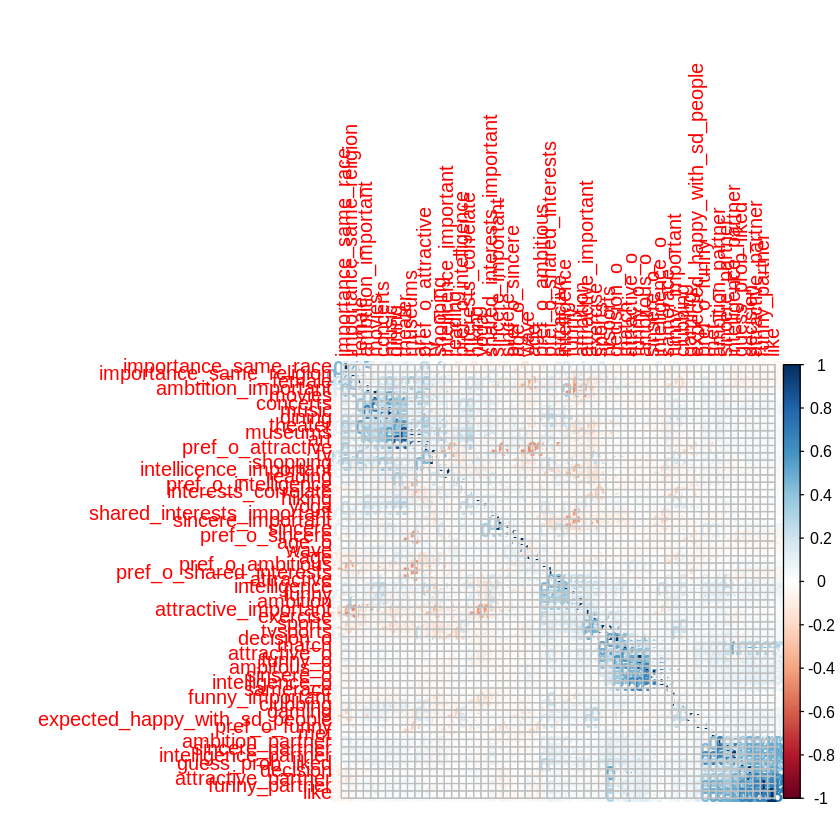

In [55]:
cor_matrix <- cor(df_scaled)

corrplot(cor_matrix, method = "number",number.cex=1, order="hclust",mar = c(0, 0, 0.01, 0))

In [56]:
col_names=colnames(df)
col_names

[1] "wave"                          "female"                       
 [3] "age"                           "age_o"                        
 [5] "samerace"                      "importance_same_race"         
 [7] "importance_same_religion"      "pref_o_attractive"            
 [9] "pref_o_sincere"                "pref_o_intelligence"          
[11] "pref_o_funny"                  "pref_o_ambitious"             
[13] "pref_o_shared_interests"       "attractive_o"                 
[15] "sinsere_o"                     "intelligence_o"               
[17] "funny_o"                       "ambitous_o"                   
[19] "attractive_important"          "sincere_important"            
[21] "intellicence_important"        "funny_important"              
[23] "ambtition_important"           "shared_interests_important"   
[25] "attractive"                    "sincere"                      
[27] "intelligence"                  "funny"                        
[29] "ambition"                      "attractive_partner"           
[31] "sincere_partner"               "intelligence_partner"         
[33] "funny_partner"                 "ambition_partner"             
[35] "sports"                        "tvsports"                     
[37] "exercise"                      "dining"                       
[39] "museums"                       "art"                          
[41] "hiking"                        "gaming"                       
[43] "clubbing"                      "reading"                      
[45] "tv"                            "theater"                      
[47] "movies"                        "concerts"                     
[49] "music"                         "shopping"                     
[51] "yoga"                          "interests_correlate"          
[53] "expected_happy_with_sd_people" "like"                         
[55] "guess_prob_liked"              "met"                          
[57] "decision"                      "decision_o"                   
[59] "match"

In [57]:
for (i in 1:length(col_names))
    {
    a<-colnames(df)[which(cor_matrix[i,] > abs(0.45) & cor_matrix[i,] != 1 )]
    if( length(a) != 0 ){
        print(paste(col_names[i],":",a))        
    }   
}


[1] "attractive_o : funny_o"    "attractive_o : decision_o"
[1] "sinsere_o : intelligence_o" "sinsere_o : funny_o"       
[3] "sinsere_o : ambitous_o"    
[1] "intelligence_o : sinsere_o"  "intelligence_o : funny_o"   
[3] "intelligence_o : ambitous_o"
[1] "funny_o : attractive_o"   "funny_o : sinsere_o"     
[3] "funny_o : intelligence_o" "funny_o : ambitous_o"    
[1] "ambitous_o : sinsere_o"      "ambitous_o : intelligence_o"
[3] "ambitous_o : funny_o"       
[1] "attractive_partner : funny_partner" "attractive_partner : like"         
[3] "attractive_partner : decision"     
[1] "sincere_partner : intelligence_partner"
[2] "sincere_partner : funny_partner"       
[3] "sincere_partner : like"                
[1] "intelligence_partner : sincere_partner" 
[2] "intelligence_partner : funny_partner"   
[3] "intelligence_partner : ambition_partner"
[4] "intelligence_partner : like"            
[1] "funny_partner : attractive_partner"  
[2] "funny_partner : sincere_partner"     
[3] "funn

In [58]:
df_list <- list()

for (i in 1:length(col_names))
    {
    a<-colnames(df)[which(cor_matrix[i,] > abs(0.45) &  cor_matrix[i,] != 1 )]
    if( length(a) != 0 && !(a %in% df_list)){
        df_list <- append(df_list, a)  
    }
}

df_list<-unique(df_list)
df_list



[[1]]
[1] "funny_o"

[[2]]
[1] "decision_o"

[[3]]
[1] "intelligence_o"

[[4]]
[1] "ambitous_o"

[[5]]
[1] "sinsere_o"

[[6]]
[1] "attractive_o"

[[7]]
[1] "funny_partner"

[[8]]
[1] "like"

[[9]]
[1] "decision"

[[10]]
[1] "intelligence_partner"

[[11]]
[1] "sincere_partner"

[[12]]
[1] "ambition_partner"

[[13]]
[1] "attractive_partner"

[[14]]
[1] "tvsports"

[[15]]
[1] "sports"

[[16]]
[1] "art"

[[17]]
[1] "theater"

[[18]]
[1] "museums"

[[19]]
[1] "music"

[[20]]
[1] "concerts"

In [59]:

df1 <- data.frame(df$funny_o,df$intelligence_o,df$sinsere_o,
df$ambitous_o,
df$attractive_o,
df$funny_partner,
df$like,
df$intelligence_partner,
df$sincere_partner,
df$ambition_partner,
df$attractive_partner,
df$art,
df$theater,
df$museums,
df$music,
df$concerts,
df$match,
df$decision,
df$decision_o,
df$tvsports,
df$sports
)
df1

df.funny_o,df.intelligence_o,df.sinsere_o,df.ambitous_o,df.attractive_o,df.funny_partner,df.like,df.intelligence_partner,df.sincere_partner,df.ambition_partner,⋯,df.art,df.theater,df.museums,df.music,df.concerts,df.match,df.decision,df.decision_o,df.tvsports,df.sports
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
8,8,8,8,6,7,7,7,9,6,⋯,1,1,1,9,10,0,1,0,2,9
7,10,8,7,7,8,7,7,8,5,⋯,1,1,1,9,10,0,1,0,2,9
8,9,8,9,7,7,7,8,6,6,⋯,1,1,1,9,10,1,1,1,2,9
6,9,7,9,8,7,6,7,6,6,⋯,1,1,1,9,10,1,1,1,2,9
8,8,7,7,7,4,6,7,9,6,⋯,1,1,1,9,10,0,0,1,2,9
5,7,6,8,3,4,6,7,6,6,⋯,1,1,1,9,10,0,1,0,2,9
8,8,7,8,7,9,7,8,6,8,⋯,1,1,1,9,10,1,1,1,2,9
6,6,6,6,6,8,6,6,6,10,⋯,1,1,1,9,10,0,1,0,2,9
9,6,7,7,8,4,6,8,7,6,⋯,6,9,8,8,7,0,0,0,2,3


In [60]:
colnames(df1) <- gsub("^.{3}", "", colnames(df1))
head(df1)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,funny_partner,like,intelligence_partner,sincere_partner,ambition_partner,⋯,art,theater,museums,music,concerts,match,decision,decision_o,tvsports,sports
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,8,8,8,8,6,7,7,7,9,6,⋯,1,1,1,9,10,0,1,0,2,9
2,7,10,8,7,7,8,7,7,8,5,⋯,1,1,1,9,10,0,1,0,2,9
3,8,9,8,9,7,7,7,8,6,6,⋯,1,1,1,9,10,1,1,1,2,9
4,6,9,7,9,8,7,6,7,6,6,⋯,1,1,1,9,10,1,1,1,2,9
5,8,8,7,7,7,4,6,7,9,6,⋯,1,1,1,9,10,0,0,1,2,9
6,5,7,6,8,3,4,6,7,6,6,⋯,1,1,1,9,10,0,1,0,2,9


In [61]:
cor(df1)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,funny_partner,like,intelligence_partner,sincere_partner,ambition_partner,⋯,art,theater,museums,music,concerts,match,decision,decision_o,tvsports,sports
funny_o,1.000000000,0.490273101,0.495757314,0.488663505,0.5807832956,0.15971784,0.12673354,0.12267320,0.13374231,0.100173761,⋯,0.021390982,0.0081517422,0.009187839,0.037113657,-0.0129780204,0.275785388,0.044258943,0.407366843,0.012860779,0.075199515
intelligence_o,0.490273101,1.000000000,0.656669143,0.622545179,0.3742910195,0.11762330,0.12430878,0.07052859,0.08289994,0.054262903,⋯,-0.008784254,-0.0431106322,-0.014953726,-0.004682318,-0.0118385942,0.166288630,0.089205502,0.202303951,-0.009741796,0.050552612
sinsere_o,0.495757314,0.656669143,1.000000000,0.452033634,0.3845335194,0.12979674,0.12565934,0.08225821,0.08959148,0.091773261,⋯,0.024034748,0.0076926826,0.013760013,0.036643731,0.0256010934,0.164275998,0.084803651,0.199452223,0.014943856,0.029882791
ambitous_o,0.488663505,0.622545179,0.452033634,1.000000000,0.3503092882,0.09419866,0.09564136,0.05611588,0.09113456,0.009007444,⋯,-0.023878019,-0.0434567730,-0.025131270,-0.005350120,-0.0433527306,0.138962970,0.066960768,0.181573214,0.011976725,0.077380853
attractive_o,0.580783296,0.374291019,0.384533519,0.350309288,1.0000000000,0.06061684,0.05220097,0.09504999,0.09253235,0.072555373,⋯,0.019428243,-0.0032326927,0.019552169,0.048793757,0.0003892147,0.263316593,-0.064115266,0.485055663,-0.001999057,0.111889361
funny_partner,0.159717844,0.117623300,0.129796735,0.094198661,0.0606168440,1.00000000,0.68377961,0.48989492,0.49190401,0.484314122,⋯,0.063314278,0.0370643368,0.055790298,0.090896061,0.0628985696,0.273688131,0.404992508,0.042887717,0.057548096,0.057446898
like,0.126733535,0.124308782,0.125659342,0.095641364,0.0522009688,0.68377961,1.00000000,0.49397919,0.50690236,0.434341254,⋯,0.036661956,0.0333695333,0.049493670,0.045615737,0.0453974023,0.306889042,0.511482482,0.030681420,0.040898256,0.045177926
intelligence_partner,0.122673204,0.070528588,0.082258212,0.056115882,0.0950499880,0.48989492,0.49397919,1.00000000,0.65431424,0.625395871,⋯,0.076885880,0.1110183814,0.084803661,0.089452705,0.0547398559,0.167399364,0.202983300,0.085882816,0.047748135,0.039999232
sincere_partner,0.133742315,0.082899944,0.089591477,0.091134563,0.0925323548,0.49190401,0.50690236,0.65431424,1.00000000,0.448373326,⋯,0.067214519,0.0624472501,0.055056294,0.071250651,0.0219360134,0.163676023,0.199983796,0.084178645,0.064800038,0.051759270
ambition_partner,0.100173761,0.054262903,0.091773261,0.009007444,0.0725553727,0.48431412,0.43434125,0.62539587,0.44837333,1.000000000,⋯,0.072641130,0.0889048106,0.076148784,0.099576352,0.0888083578,0.138312691,0.175095091,0.066880022,0.028086535,0.022891446


In [62]:
df1<- select (df1,-decision)

In [63]:
head(df1)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,funny_partner,like,intelligence_partner,sincere_partner,ambition_partner,attractive_partner,art,theater,museums,music,concerts,match,decision_o,tvsports,sports
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,8,8,8,8,6,7,7,7,9,6,6,1,1,1,9,10,0,0,2,9
2,7,10,8,7,7,8,7,7,8,5,7,1,1,1,9,10,0,0,2,9
3,8,9,8,9,7,7,7,8,6,6,7,1,1,1,9,10,1,1,2,9
4,6,9,7,9,8,7,6,7,6,6,5,1,1,1,9,10,1,1,2,9
5,8,8,7,7,7,4,6,7,9,6,4,1,1,1,9,10,0,1,2,9
6,5,7,6,8,3,4,6,7,6,6,7,1,1,1,9,10,0,0,2,9


In [64]:
df1$qualites_p <- ifelse(df1$attractive_partner > 6.5 & df1$funny_partner > 6.5 & df1$ambition_partner > 5 & df1$intelligence_partner > 4.5 & df1$sincere_partner > 5.5, 1, 0)


In [65]:
unique(df1$qualites_p)

[1] 0 1

In [66]:
cor(df1)
df1<- select (df1,-intelligence_partner,-sincere_partner,-ambition_partner,-attractive_partner,-funny_partner)
cor(df1)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,funny_partner,like,intelligence_partner,sincere_partner,ambition_partner,⋯,art,theater,museums,music,concerts,match,decision_o,tvsports,sports,qualites_p
funny_o,1.000000000,0.490273101,0.495757314,0.488663505,0.5807832956,0.15971784,0.12673354,0.12267320,0.13374231,0.100173761,⋯,0.021390982,0.0081517422,0.009187839,0.037113657,-0.0129780204,0.275785388,0.407366843,0.012860779,0.075199515,0.094844447
intelligence_o,0.490273101,1.000000000,0.656669143,0.622545179,0.3742910195,0.11762330,0.12430878,0.07052859,0.08289994,0.054262903,⋯,-0.008784254,-0.0431106322,-0.014953726,-0.004682318,-0.0118385942,0.166288630,0.202303951,-0.009741796,0.050552612,0.069564865
sinsere_o,0.495757314,0.656669143,1.000000000,0.452033634,0.3845335194,0.12979674,0.12565934,0.08225821,0.08959148,0.091773261,⋯,0.024034748,0.0076926826,0.013760013,0.036643731,0.0256010934,0.164275998,0.199452223,0.014943856,0.029882791,0.090332354
ambitous_o,0.488663505,0.622545179,0.452033634,1.000000000,0.3503092882,0.09419866,0.09564136,0.05611588,0.09113456,0.009007444,⋯,-0.023878019,-0.0434567730,-0.025131270,-0.005350120,-0.0433527306,0.138962970,0.181573214,0.011976725,0.077380853,0.048019002
attractive_o,0.580783296,0.374291019,0.384533519,0.350309288,1.0000000000,0.06061684,0.05220097,0.09504999,0.09253235,0.072555373,⋯,0.019428243,-0.0032326927,0.019552169,0.048793757,0.0003892147,0.263316593,0.485055663,-0.001999057,0.111889361,0.035774845
funny_partner,0.159717844,0.117623300,0.129796735,0.094198661,0.0606168440,1.00000000,0.68377961,0.48989492,0.49190401,0.484314122,⋯,0.063314278,0.0370643368,0.055790298,0.090896061,0.0628985696,0.273688131,0.042887717,0.057548096,0.057446898,0.585078388
like,0.126733535,0.124308782,0.125659342,0.095641364,0.0522009688,0.68377961,1.00000000,0.49397919,0.50690236,0.434341254,⋯,0.036661956,0.0333695333,0.049493670,0.045615737,0.0453974023,0.306889042,0.030681420,0.040898256,0.045177926,0.532414046
intelligence_partner,0.122673204,0.070528588,0.082258212,0.056115882,0.0950499880,0.48989492,0.49397919,1.00000000,0.65431424,0.625395871,⋯,0.076885880,0.1110183814,0.084803661,0.089452705,0.0547398559,0.167399364,0.085882816,0.047748135,0.039999232,0.366914398
sincere_partner,0.133742315,0.082899944,0.089591477,0.091134563,0.0925323548,0.49190401,0.50690236,0.65431424,1.00000000,0.448373326,⋯,0.067214519,0.0624472501,0.055056294,0.071250651,0.0219360134,0.163676023,0.084178645,0.064800038,0.051759270,0.367843887
ambition_partner,0.100173761,0.054262903,0.091773261,0.009007444,0.0725553727,0.48431412,0.43434125,0.62539587,0.44837333,1.000000000,⋯,0.072641130,0.0889048106,0.076148784,0.099576352,0.0888083578,0.138312691,0.066880022,0.028086535,0.022891446,0.406017731


,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,art,theater,museums,music,concerts,match,decision_o,tvsports,sports,qualites_p
funny_o,1.000000000,0.490273101,0.495757314,0.48866351,0.5807832956,0.12673354,0.021390982,0.008151742,0.009187839,0.037113657,-0.0129780204,0.275785388,0.407366843,0.012860779,0.07519952,0.094844447
intelligence_o,0.490273101,1.000000000,0.656669143,0.62254518,0.3742910195,0.12430878,-0.008784254,-0.043110632,-0.014953726,-0.004682318,-0.0118385942,0.166288630,0.202303951,-0.009741796,0.05055261,0.069564865
sinsere_o,0.495757314,0.656669143,1.000000000,0.45203363,0.3845335194,0.12565934,0.024034748,0.007692683,0.013760013,0.036643731,0.0256010934,0.164275998,0.199452223,0.014943856,0.02988279,0.090332354
ambitous_o,0.488663505,0.622545179,0.452033634,1.00000000,0.3503092882,0.09564136,-0.023878019,-0.043456773,-0.025131270,-0.005350120,-0.0433527306,0.138962970,0.181573214,0.011976725,0.07738085,0.048019002
attractive_o,0.580783296,0.374291019,0.384533519,0.35030929,1.0000000000,0.05220097,0.019428243,-0.003232693,0.019552169,0.048793757,0.0003892147,0.263316593,0.485055663,-0.001999057,0.11188936,0.035774845
like,0.126733535,0.124308782,0.125659342,0.09564136,0.0522009688,1.00000000,0.036661956,0.033369533,0.049493670,0.045615737,0.0453974023,0.306889042,0.030681420,0.040898256,0.04517793,0.532414046
art,0.021390982,-0.008784254,0.024034748,-0.02387802,0.0194282429,0.03666196,1.000000000,0.526050361,0.852315491,0.284388123,0.3982028331,0.036901403,0.016260014,-0.072936586,-0.12072449,0.047115594
theater,0.008151742,-0.043110632,0.007692683,-0.04345677,-0.0032326927,0.03336953,0.526050361,1.000000000,0.545600582,0.233119185,0.4039007913,-0.001481804,-0.013970260,-0.085810896,-0.23955738,0.031644035
museums,0.009187839,-0.014953726,0.013760013,-0.02513127,0.0195521693,0.04949367,0.852315491,0.545600582,1.000000000,0.259431450,0.3681295759,0.014408861,0.011289247,-0.062147513,-0.12273022,0.043515881
music,0.037113657,-0.004682318,0.036643731,-0.00535012,0.0487937570,0.04561574,0.284388123,0.233119185,0.259431450,1.000000000,0.6579670523,0.025501083,0.011527948,0.071873371,0.02147302,0.048879358


In [67]:
df1$arts <- ifelse(df1$art > 6 & df1$theater > 5 & df1$museums > 5 & df1$music > 5 & df1$concerts > 5, 1, 0)


In [68]:
cor(df1)
df1<- select (df1,-art,-theater,-museums,-music,-concerts)
cor(df1)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,art,theater,museums,music,concerts,match,decision_o,tvsports,sports,qualites_p,arts
funny_o,1.000000000,0.490273101,0.495757314,0.48866351,0.5807832956,0.12673354,0.021390982,0.008151742,0.009187839,0.037113657,-0.0129780204,0.275785388,0.407366843,0.012860779,0.07519952,0.094844447,-0.004005403
intelligence_o,0.490273101,1.000000000,0.656669143,0.62254518,0.3742910195,0.12430878,-0.008784254,-0.043110632,-0.014953726,-0.004682318,-0.0118385942,0.166288630,0.202303951,-0.009741796,0.05055261,0.069564865,-0.009644758
sinsere_o,0.495757314,0.656669143,1.000000000,0.45203363,0.3845335194,0.12565934,0.024034748,0.007692683,0.013760013,0.036643731,0.0256010934,0.164275998,0.199452223,0.014943856,0.02988279,0.090332354,0.020001005
ambitous_o,0.488663505,0.622545179,0.452033634,1.00000000,0.3503092882,0.09564136,-0.023878019,-0.043456773,-0.025131270,-0.005350120,-0.0433527306,0.138962970,0.181573214,0.011976725,0.07738085,0.048019002,-0.037828904
attractive_o,0.580783296,0.374291019,0.384533519,0.35030929,1.0000000000,0.05220097,0.019428243,-0.003232693,0.019552169,0.048793757,0.0003892147,0.263316593,0.485055663,-0.001999057,0.11188936,0.035774845,0.008806725
like,0.126733535,0.124308782,0.125659342,0.09564136,0.0522009688,1.00000000,0.036661956,0.033369533,0.049493670,0.045615737,0.0453974023,0.306889042,0.030681420,0.040898256,0.04517793,0.532414046,0.043260039
art,0.021390982,-0.008784254,0.024034748,-0.02387802,0.0194282429,0.03666196,1.000000000,0.526050361,0.852315491,0.284388123,0.3982028331,0.036901403,0.016260014,-0.072936586,-0.12072449,0.047115594,0.635838459
theater,0.008151742,-0.043110632,0.007692683,-0.04345677,-0.0032326927,0.03336953,0.526050361,1.000000000,0.545600582,0.233119185,0.4039007913,-0.001481804,-0.013970260,-0.085810896,-0.23955738,0.031644035,0.591081750
museums,0.009187839,-0.014953726,0.013760013,-0.02513127,0.0195521693,0.04949367,0.852315491,0.545600582,1.000000000,0.259431450,0.3681295759,0.014408861,0.011289247,-0.062147513,-0.12273022,0.043515881,0.580719124
music,0.037113657,-0.004682318,0.036643731,-0.00535012,0.0487937570,0.04561574,0.284388123,0.233119185,0.259431450,1.000000000,0.6579670523,0.025501083,0.011527948,0.071873371,0.02147302,0.048879358,0.362914993


,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,qualites_p,arts
funny_o,1.000000000,0.490273101,0.49575731,0.48866351,0.580783296,0.12673354,0.275785388,0.407366843,0.012860779,0.07519952,0.094844447,-0.004005403
intelligence_o,0.490273101,1.000000000,0.65666914,0.62254518,0.374291019,0.12430878,0.166288630,0.202303951,-0.009741796,0.05055261,0.069564865,-0.009644758
sinsere_o,0.495757314,0.656669143,1.00000000,0.45203363,0.384533519,0.12565934,0.164275998,0.199452223,0.014943856,0.02988279,0.090332354,0.020001005
ambitous_o,0.488663505,0.622545179,0.45203363,1.00000000,0.350309288,0.09564136,0.138962970,0.181573214,0.011976725,0.07738085,0.048019002,-0.037828904
attractive_o,0.580783296,0.374291019,0.38453352,0.35030929,1.000000000,0.05220097,0.263316593,0.485055663,-0.001999057,0.11188936,0.035774845,0.008806725
like,0.126733535,0.124308782,0.12565934,0.09564136,0.052200969,1.00000000,0.306889042,0.030681420,0.040898256,0.04517793,0.532414046,0.043260039
match,0.275785388,0.166288630,0.16427600,0.13896297,0.263316593,0.30688904,1.000000000,0.523236117,-0.003858262,0.01389272,0.253630728,0.023928212
decision_o,0.407366843,0.202303951,0.19945222,0.18157321,0.485055663,0.03068142,0.523236117,1.000000000,-0.014422039,0.05681523,0.006993963,0.003246380
tvsports,0.012860779,-0.009741796,0.01494386,0.01197672,-0.001999057,0.04089826,-0.003858262,-0.014422039,1.000000000,0.48697581,0.040129114,-0.024547631
sports,0.075199515,0.050552612,0.02988279,0.07738085,0.111889361,0.04517793,0.013892723,0.056815225,0.486975808,1.00000000,0.021169192,-0.142036824


In [69]:
head(df1)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,qualites_p,arts
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,8,8,8,8,6,7,0,0,2,9,0,0
2,7,10,8,7,7,7,0,0,2,9,0,0
3,8,9,8,9,7,7,1,1,2,9,1,0
4,6,9,7,9,8,6,1,1,2,9,0,0
5,8,8,7,7,7,6,0,1,2,9,0,0
6,5,7,6,8,3,6,0,0,2,9,0,0


In [70]:
df1_scaled <- scale(df1[!sapply(df1,class) %in% c('factor')])


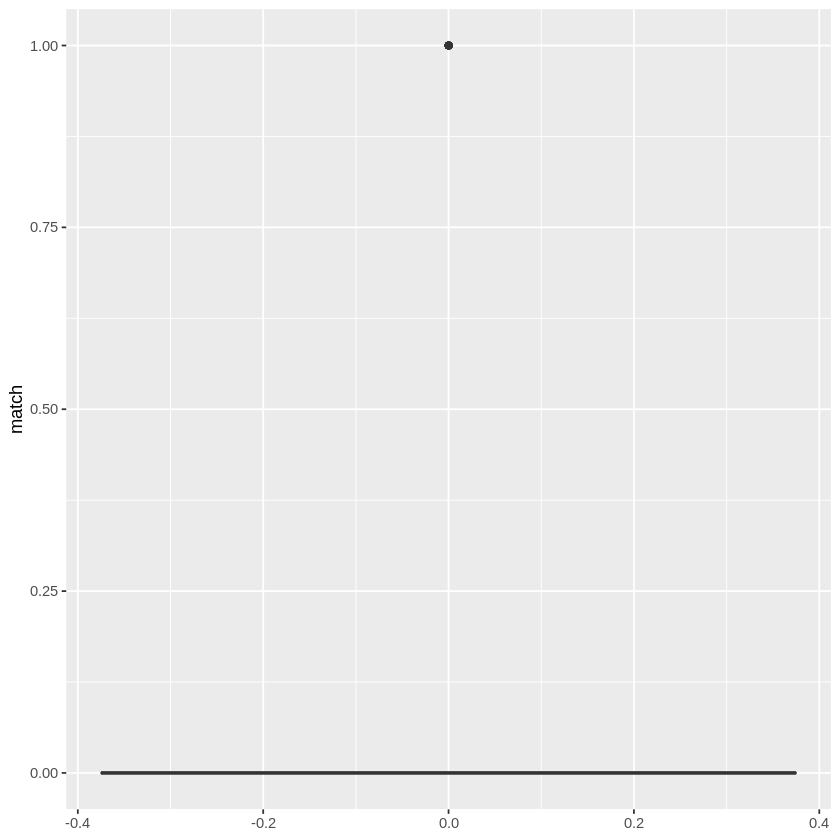

In [71]:

plot = ggplot(df1, aes_string(y = "match"))+geom_boxplot()
plot

In [72]:
cbind(df1, df1_scaled)

funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,⋯,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,qualites_p,arts
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,8,8,8,6,7,0,0,2,9,⋯,0.4719066,0.6763590,-0.1083084,0.46803880,-0.4559481,-0.8714002,-0.9213866,0.983233,-0.6732683,-0.870851
7,10,8,7,7,7,0,0,2,9,⋯,0.4719066,0.1151351,0.4089545,0.46803880,-0.4559481,-0.8714002,-0.9213866,0.983233,-0.6732683,-0.870851
8,9,8,9,7,7,1,1,2,9,⋯,0.4719066,1.2375828,0.4089545,0.46803880,2.1928931,1.1474009,-0.9213866,0.983233,1.4850623,-0.870851
6,9,7,9,8,6,1,1,2,9,⋯,-0.1061645,1.2375828,0.9262174,-0.08357866,2.1928931,1.1474009,-0.9213866,0.983233,-0.6732683,-0.870851
8,8,7,7,7,6,0,1,2,9,⋯,-0.1061645,0.1151351,0.4089545,-0.08357866,-0.4559481,1.1474009,-0.9213866,0.983233,-0.6732683,-0.870851
5,7,6,8,3,6,0,0,2,9,⋯,-0.6842355,0.6763590,-1.6600972,-0.08357866,-0.4559481,-0.8714002,-0.9213866,0.983233,-0.6732683,-0.870851
8,8,7,8,7,7,1,1,2,9,⋯,-0.1061645,0.6763590,0.4089545,0.46803880,2.1928931,1.1474009,-0.9213866,0.983233,1.4850623,-0.870851
6,6,6,6,6,6,0,0,2,9,⋯,-0.6842355,-0.4460888,-0.1083084,-0.08357866,-0.4559481,-0.8714002,-0.9213866,0.983233,-0.6732683,-0.870851
9,6,7,7,8,6,0,0,2,3,⋯,-0.1061645,0.1151351,0.9262174,-0.08357866,-0.4559481,-0.8714002,-0.9213866,-1.323722,-0.6732683,-0.870851


Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     1.8444620 1.2719814 1.2284883 1.1376086 0.99100789
Proportion of Variance 0.2835472 0.1348489 0.1257847 0.1078628 0.08185405
Cumulative Proportion  0.2835472 0.4183961 0.5441808 0.6520436 0.73389769
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.81108766 0.74257416 0.70289592 0.67703423 0.62406372
Proportion of Variance 0.05483041 0.04595847 0.04117826 0.03820385 0.03245965
Cumulative Proportion  0.78872810 0.83468658 0.87586484 0.91406869 0.94652834
                         Comp.11    Comp.12
Standard deviation     0.5974596 0.53348175
Proportion of Variance 0.0297511 0.02372057
Cumulative Proportion  0.9762794 1.00000000

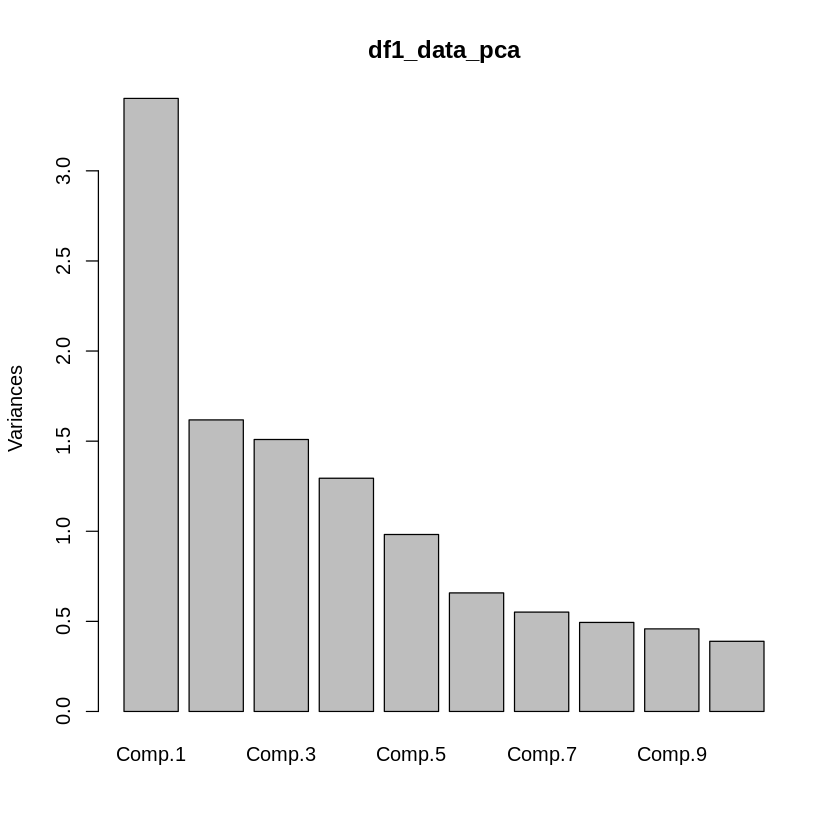

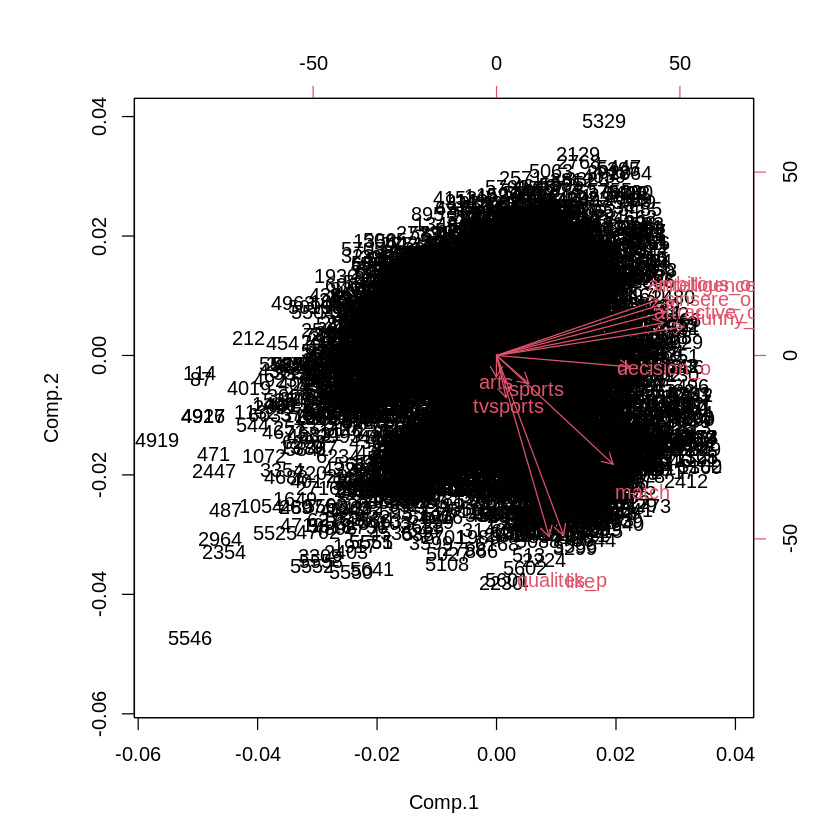

In [73]:
df1_data <- as.data.frame(scale(df1_scaled))
df1_data_pca= princomp(df1_data)

summary(df1_data_pca)

plot(df1_data_pca)
biplot(df1_data_pca)

In [74]:
col_names =colnames(df1)
col_names

[1] "funny_o"        "intelligence_o" "sinsere_o"      "ambitous_o"    
 [5] "attractive_o"   "like"           "match"          "decision_o"    
 [9] "tvsports"       "sports"         "qualites_p"     "arts"

In [75]:
df1_data_pca$loading


Loadings:
               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
funny_o         0.430                              0.348         0.253  0.205
intelligence_o  0.408  0.182        -0.333        -0.277        -0.135 -0.104
sinsere_o       0.389  0.146        -0.290        -0.141 -0.645 -0.193       
ambitous_o      0.372  0.186        -0.284        -0.197  0.682  0.221       
attractive_o    0.384  0.110         0.265         0.586                     
like            0.154 -0.599        -0.247                      -0.236  0.650
match           0.268 -0.362  0.139  0.399        -0.526                     
decision_o      0.308                0.601        -0.121               -0.117
tvsports              -0.141 -0.660         0.277 -0.165 -0.209  0.576  0.185
sports                       -0.685                       0.197 -0.613 -0.218
qualites_p      0.121 -0.604        -0.248         0.267         0.232 -0.645
arts                          0.244         0.948    

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     3.3353680 3.0651373 1.9326600 1.81031542 1.62082666
Proportion of Variance 0.3216856 0.2716714 0.1080078 0.09476601 0.07596565
Cumulative Proportion  0.3216856 0.5933570 0.7013648 0.79613080 0.87209644
                           Comp.6     Comp.7     Comp.8      Comp.9     Comp.10
Standard deviation     1.29831326 1.19439407 0.86280996 0.487766504 0.422871644
Proportion of Variance 0.04874197 0.04125146 0.02152655 0.006879677 0.005170841
Cumulative Proportion  0.92083841 0.96208988 0.98361643 0.990496103 0.995666944
                           Comp.11
Standard deviation     0.387101703
Proportion of Variance 0.004333056
Cumulative Proportion  1.000000000

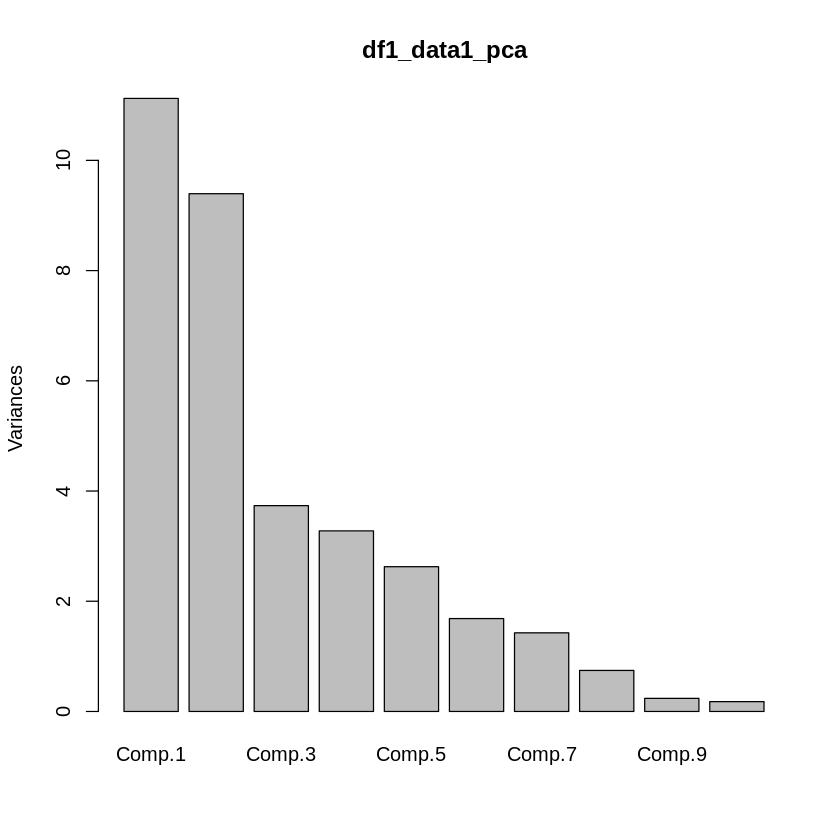

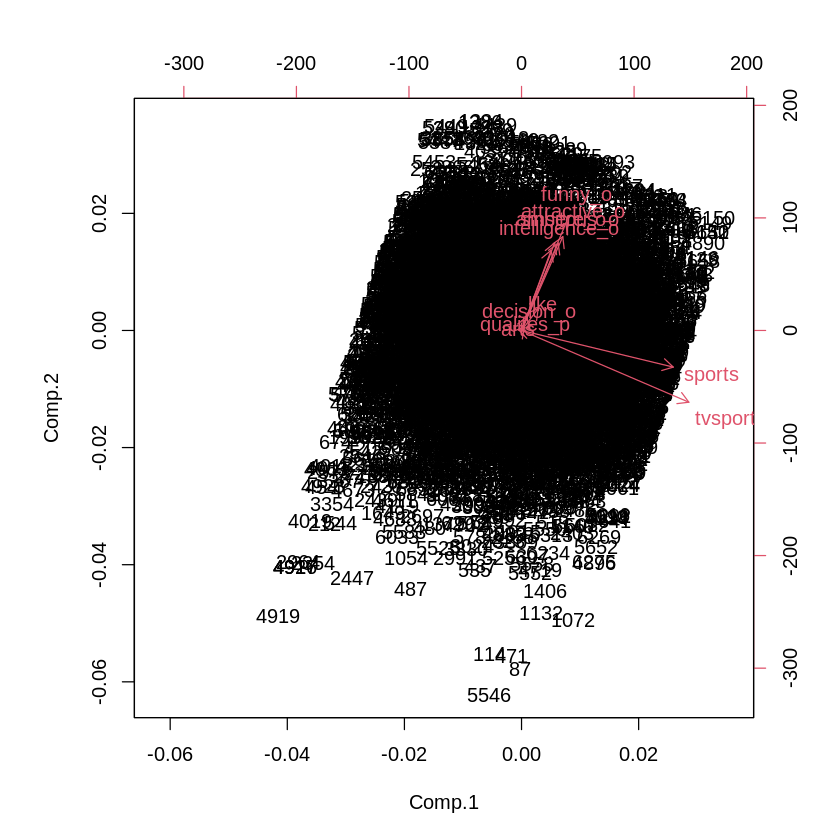

In [76]:
df1_data1 <- select(df1,-match)
df1_data1_pca= princomp(df1_data1)

summary(df1_data1_pca)

plot(df1_data1_pca)
biplot(df1_data1_pca)

In [77]:
for (i in 1:length(col_names ))
    {
    print(col_names[i])
    print(sd(df1[[i]]))
}

[1] "funny_o"
[1] 1.932366
[1] "intelligence_o"
[1] 1.530361
[1] "sinsere_o"
[1] 1.729891
[1] "ambitous_o"
[1] 1.78182
[1] "attractive_o"
[1] 1.933253
[1] "like"
[1] 1.812851
[1] "match"
[1] 0.3775236
[1] "decision_o"
[1] 0.4953435
[1] "tvsports"
[1] 2.801927
[1] "sports"
[1] 2.600831
[1] "qualites_p"
[1] 0.4633211
[1] "arts"
[1] 0.4953007


In [78]:
df1_scaled<-as.data.frame(df1_scaled)
cor(df1_scaled)


,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,qualites_p,arts
funny_o,1.000000000,0.490273101,0.49575731,0.48866351,0.580783296,0.12673354,0.275785388,0.407366843,0.012860779,0.07519952,0.094844447,-0.004005403
intelligence_o,0.490273101,1.000000000,0.65666914,0.62254518,0.374291019,0.12430878,0.166288630,0.202303951,-0.009741796,0.05055261,0.069564865,-0.009644758
sinsere_o,0.495757314,0.656669143,1.00000000,0.45203363,0.384533519,0.12565934,0.164275998,0.199452223,0.014943856,0.02988279,0.090332354,0.020001005
ambitous_o,0.488663505,0.622545179,0.45203363,1.00000000,0.350309288,0.09564136,0.138962970,0.181573214,0.011976725,0.07738085,0.048019002,-0.037828904
attractive_o,0.580783296,0.374291019,0.38453352,0.35030929,1.000000000,0.05220097,0.263316593,0.485055663,-0.001999057,0.11188936,0.035774845,0.008806725
like,0.126733535,0.124308782,0.12565934,0.09564136,0.052200969,1.00000000,0.306889042,0.030681420,0.040898256,0.04517793,0.532414046,0.043260039
match,0.275785388,0.166288630,0.16427600,0.13896297,0.263316593,0.30688904,1.000000000,0.523236117,-0.003858262,0.01389272,0.253630728,0.023928212
decision_o,0.407366843,0.202303951,0.19945222,0.18157321,0.485055663,0.03068142,0.523236117,1.000000000,-0.014422039,0.05681523,0.006993963,0.003246380
tvsports,0.012860779,-0.009741796,0.01494386,0.01197672,-0.001999057,0.04089826,-0.003858262,-0.014422039,1.000000000,0.48697581,0.040129114,-0.024547631
sports,0.075199515,0.050552612,0.02988279,0.07738085,0.111889361,0.04517793,0.013892723,0.056815225,0.486975808,1.00000000,0.021169192,-0.142036824


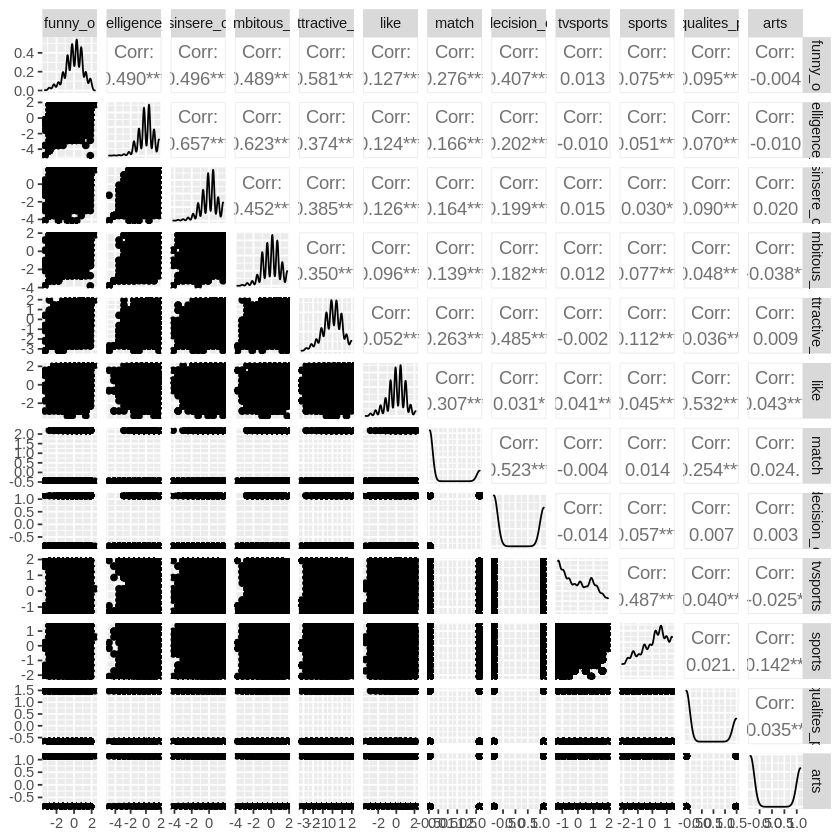

In [79]:
plot1<-ggpairs(df1_scaled)
plot1

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”
Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”


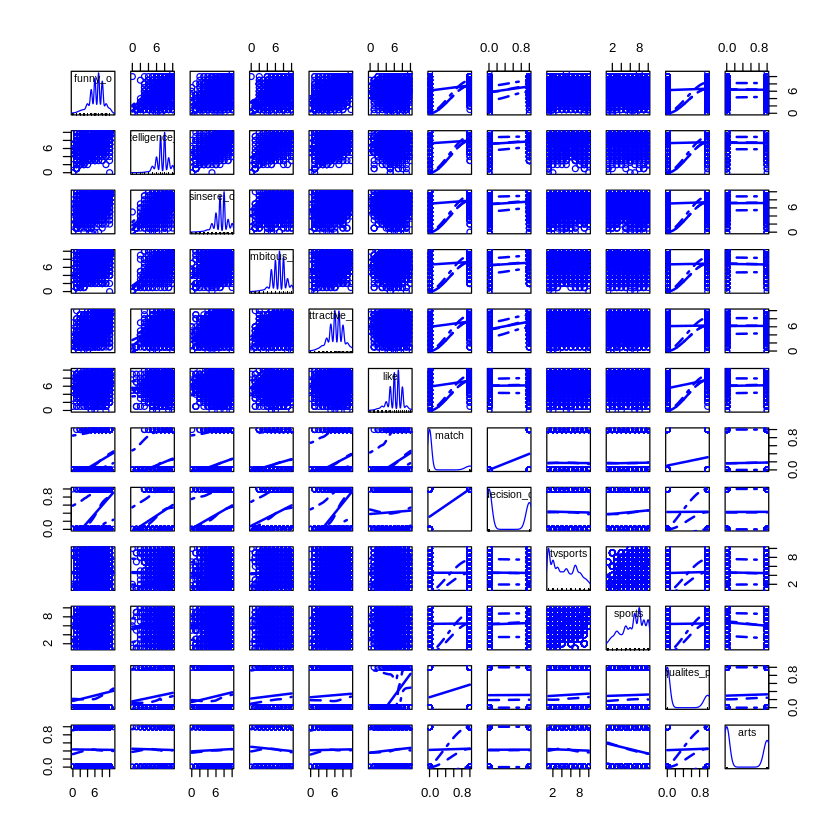

In [80]:
scatterplotMatrix(df1)

In [81]:
head(df1)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,qualites_p,arts
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,8,8,8,8,6,7,0,0,2,9,0,0
2,7,10,8,7,7,7,0,0,2,9,0,0
3,8,9,8,9,7,7,1,1,2,9,1,0
4,6,9,7,9,8,6,1,1,2,9,0,0
5,8,8,7,7,7,6,0,1,2,9,0,0
6,5,7,6,8,3,6,0,0,2,9,0,0


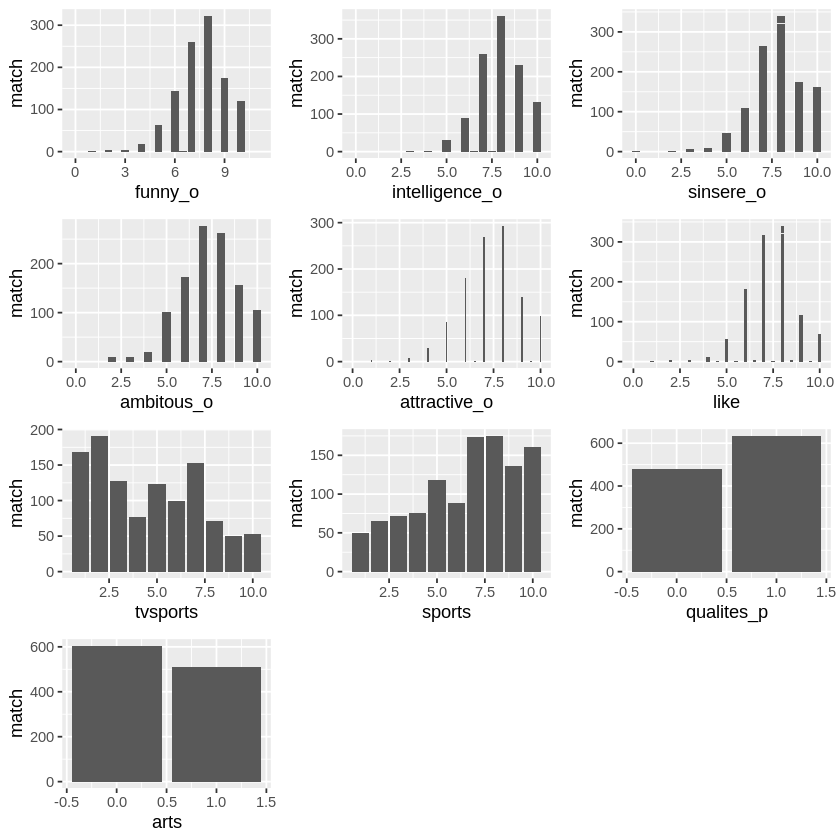

In [82]:

grid.arrange(
ggplot(df1, aes(x=funny_o,y=match)) + xlab("funny_o")+ ylab("match") + 
    geom_bar(stat="identity") ,
ggplot(df1, aes(x=intelligence_o,y=match)) + xlab("intelligence_o")+ ylab("match") + 
    geom_bar(stat="identity") ,
ggplot(df1, aes(x=sinsere_o,y=match)) + xlab("sinsere_o")+ ylab("match") + 
    geom_bar(stat="identity"),
ggplot(df1, aes(x=ambitous_o,y=match)) + xlab("ambitous_o")+ ylab("match") + 
    geom_bar(stat="identity"),
ggplot(df1, aes(x=attractive_o,y=match)) + xlab("attractive_o")+ ylab("match") + 
    geom_bar(stat="identity") ,
ggplot(df1, aes(x=like,y=match)) + xlab("like")+ ylab("match") + 
    geom_bar(stat="identity") ,
ggplot(df1, aes(x=tvsports,y=match)) + xlab("tvsports")+ ylab("match") + 
    geom_bar(stat="identity"),
ggplot(df1, aes(x=sports,y=match)) + xlab("sports")+ ylab("match") + 
    geom_bar(stat="identity") ,
ggplot(df1, aes(x=qualites_p,y=match)) + xlab("qualites_p")+ ylab("match") + 
    geom_bar(stat="identity") ,
ggplot(df1, aes(x=arts,y=match)) + xlab("arts")+ ylab("match") + 
    geom_bar(stat="identity") )

## 3. 4. 5. ... The Rest..

Similar to above, have **sections** for every major step in your analysis.  PCA, FA, Clustering, etc. running your models, hypotheses, explaining what you have learned, presenting results with visualizations, and the conclusion should have their own sections. 


In [83]:

set.seed(1000)
split <- sample.split(df1, SplitRatio = 0.75)
df1_train <- subset(df1, split == TRUE)
df1_test <- subset(df1, split == FALSE)


In [84]:
nrow(df1_train)
nrow(df1_test)

[1] 4850

[1] 1616

In [85]:
head(df1_train)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,qualites_p,arts
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,8,8,8,8,6,7,0,0,2,9,0,0
3,8,9,8,9,7,7,1,1,2,9,1,0
4,6,9,7,9,8,6,1,1,2,9,0,0
5,8,8,7,7,7,6,0,1,2,9,0,0
6,5,7,6,8,3,6,0,0,2,9,0,0
8,6,6,6,6,6,6,0,0,2,9,0,0


In [86]:
cor(df1_train)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,qualites_p,arts
funny_o,1.000000000,0.4868075779,0.48863926,0.47871779,0.569871215,0.12137334,0.273025519,0.399647127,0.0093319137,0.073655421,0.093078447,-0.008644054
intelligence_o,0.486807578,1.0000000000,0.66069137,0.62282544,0.371973168,0.11737666,0.159518422,0.191937889,-0.0005094515,0.056171048,0.063823735,-0.011138596
sinsere_o,0.488639262,0.6606913732,1.00000000,0.46080744,0.382251120,0.12110099,0.157594445,0.185992642,0.0184572502,0.034820874,0.089352601,0.029053780
ambitous_o,0.478717794,0.6228254389,0.46080744,1.00000000,0.333474182,0.08707681,0.131004437,0.167307205,0.0127306155,0.081630648,0.041508054,-0.053030479
attractive_o,0.569871215,0.3719731679,0.38225112,0.33347418,1.000000000,0.05184523,0.267311631,0.483129386,0.0019458423,0.114934743,0.035227050,0.008621502
like,0.121373345,0.1173766559,0.12110099,0.08707681,0.051845227,1.00000000,0.302011658,0.019530645,0.0334283312,0.041316146,0.535473695,0.042588612
match,0.273025519,0.1595184217,0.15759445,0.13100444,0.267311631,0.30201166,1.000000000,0.516081180,-0.0062305697,0.007961545,0.255825882,0.024588724
decision_o,0.399647127,0.1919378893,0.18599264,0.16730721,0.483129386,0.01953065,0.516081180,1.000000000,-0.0100782899,0.057760007,0.002173072,0.006320759
tvsports,0.009331914,-0.0005094515,0.01845725,0.01273062,0.001945842,0.03342833,-0.006230570,-0.010078290,1.0000000000,0.488778362,0.037282113,-0.024981540
sports,0.073655421,0.0561710478,0.03482087,0.08163065,0.114934743,0.04131615,0.007961545,0.057760007,0.4887783618,1.000000000,0.020015842,-0.142345292


In [87]:
head(df1_test)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,qualites_p,arts
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
2,7,10,8,7,7,7,0,0,2,9,0,0
7,8,8,7,8,7,7,1,1,2,9,1,0
12,9,9,9,9,9,7,1,1,2,3,0,0
14,5,7,8,7,7,6,0,1,2,3,0,0
19,5,6,8,8,7,8,0,0,8,3,1,0
24,4,6,5,6,4,8,0,0,8,3,1,0


In [88]:
cor(df1_test)

,funny_o,intelligence_o,sinsere_o,ambitous_o,attractive_o,like,match,decision_o,tvsports,sports,qualites_p,arts
funny_o,1.000000000,0.501004338,0.515553248,0.515887912,0.610711023,0.14230519,0.284805598,0.430040354,0.022987406,0.07977325,0.09977168,0.009383122
intelligence_o,0.501004338,1.000000000,0.645660943,0.622159012,0.381495329,0.14444954,0.184185490,0.232230051,-0.036410008,0.03435291,0.08654059,-0.005636302
sinsere_o,0.515553248,0.645660943,1.000000000,0.427681962,0.391071926,0.13896101,0.182809977,0.238378422,0.004828792,0.01566172,0.09327967,-0.006129623
ambitous_o,0.515887912,0.622159012,0.427681962,1.000000000,0.397444896,0.12057484,0.161373749,0.222866018,0.009843604,0.06519251,0.06689635,0.006032368
attractive_o,0.610711023,0.381495329,0.391071926,0.397444896,1.000000000,0.05332828,0.253051044,0.490992646,-0.013323877,0.10315542,0.03723201,0.009528689
like,0.142305193,0.144449541,0.138961010,0.120574843,0.053328282,1.00000000,0.321372339,0.064263976,0.063300689,0.05678417,0.52320175,0.045254077
match,0.284805598,0.184185490,0.182809977,0.161373749,0.253051044,0.32137234,1.000000000,0.544370077,0.002732507,0.03087664,0.24799930,0.021669798
decision_o,0.430040354,0.232230051,0.238378422,0.222866018,0.490992646,0.06426398,0.544370077,1.000000000,-0.027416623,0.05397461,0.02156319,-0.006008744
tvsports,0.022987406,-0.036410008,0.004828792,0.009843604,-0.013323877,0.06330069,0.002732507,-0.027416623,1.000000000,0.48159859,0.04873011,-0.023314077
sports,0.079773252,0.034352913,0.015661720,0.065192509,0.103155415,0.05678417,0.030876644,0.053974615,0.481598588,1.00000000,0.02466819,-0.141154368


In [89]:
df1_train<- as.data.frame(df1_train)

# Model 1

In [90]:
lm_train=glm(match ~ . , data= df1_train,family = binomial) 
summary(lm_train)


Call:
glm(formula = match ~ ., family = binomial, data = df1_train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.39987  -0.23849  -0.00004  -0.00002   2.72931  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -25.922410 301.726454  -0.086   0.9315    
funny_o          0.086589   0.047374   1.828   0.0676 .  
intelligence_o   0.092668   0.062230   1.489   0.1365    
sinsere_o        0.015101   0.050140   0.301   0.7633    
ambitous_o      -0.002385   0.044538  -0.054   0.9573    
attractive_o    -0.083552   0.042111  -1.984   0.0472 *  
like             0.618883   0.043711  14.158   <2e-16 ***
decision_o      20.623658 301.726116   0.068   0.9455    
tvsports         0.015772   0.023301   0.677   0.4985    
sports          -0.064545   0.025108  -2.571   0.0101 *  
qualites_p       1.071117   0.125994   8.501   <2e-16 ***
arts            -0.004234   0.111779  -0.038   0.9698    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’

In [91]:
df1_predictedtrain = predict(lm_train, type="response", newdata=df1_train)
summary(df1_predictedtrain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1678  0.2564  0.9626 

In [92]:
head(df1_predictedtrain)

1            3            4            5            6            8 
6.825955e-10 6.448297e-01 2.033573e-01 2.320786e-01 3.221570e-10 2.504033e-10

In [93]:
library(reshape2)
table(df1_train$match,df1_predictedtrain>0.66)

   
    FALSE TRUE
  0  3934  102
  1   434  380

In [94]:
df1_predicted = predict(lm_train, type="response", newdata=df1_test)
summary(df1_predicted)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.1750  0.2890  0.9554 

In [95]:

table(df1_test$match,df1_predicted>0.66)

   
    FALSE TRUE
  0  1284   33
  1   169  130

[1] 0.948511

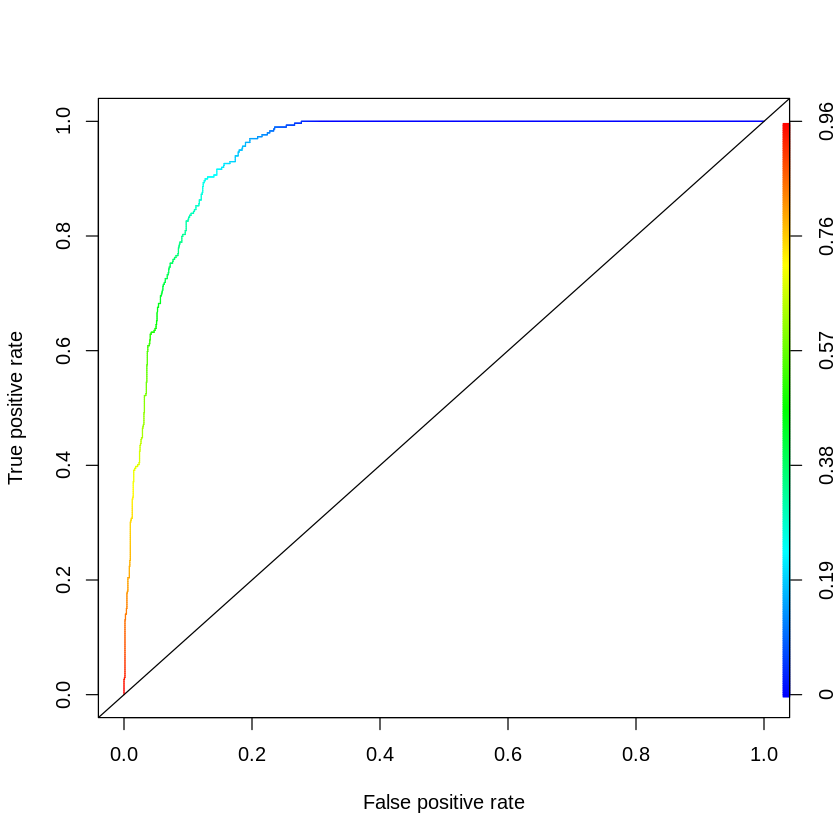

In [96]:

ROCR_predictions = prediction(df1_predicted, df1_test$match)

perf <- performance(ROCR_predictions,"tpr","fpr")

plot(perf,colorize=TRUE)
abline(0,1)
as.numeric(performance(ROCR_predictions,"auc")@y.values)

# Model 2


In [97]:
lm_train2=glm(match ~ like+qualites_p+funny_o+attractive_o+sports , data= df1_train,family=binomial) 
summary(lm_train2)


Call:
glm(formula = match ~ like + qualites_p + funny_o + attractive_o + 
    sports, family = binomial, data = df1_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2104  -0.5675  -0.3495  -0.1721   2.9855  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -8.64391    0.33432 -25.856  < 2e-16 ***
like          0.45702    0.03438  13.293  < 2e-16 ***
qualites_p    0.56042    0.10203   5.493 3.96e-08 ***
funny_o       0.26814    0.03082   8.699  < 2e-16 ***
attractive_o  0.32370    0.03005  10.771  < 2e-16 ***
sports       -0.04015    0.01667  -2.409    0.016 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4388.6  on 4849  degrees of freedom
Residual deviance: 3408.3  on 4844  degrees of freedom
AIC: 3420.3

Number of Fisher Scoring iterations: 5


In [98]:
df1_predictedtrain2= predict(lm_train2, type="response", newdata=df1_train)
summary(df1_predictedtrain2)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0003503 0.0418077 0.1021102 0.1678351 0.2340259 0.9131011 

In [99]:
table(df1_train$match,df1_predictedtrain2>0.66)

   
    FALSE TRUE
  0  3998   38
  1   726   88

In [100]:
df1_predicted2 = predict(lm_train2, type="response", newdata=df1_test)
summary(df1_predicted2)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0007644 0.0378109 0.1014787 0.1684738 0.2471703 0.9006443 

In [101]:
table(df1_test$match,df1_predicted2>0.66)

   
    FALSE TRUE
  0  1309    8
  1   271   28

[1] 0.8150136

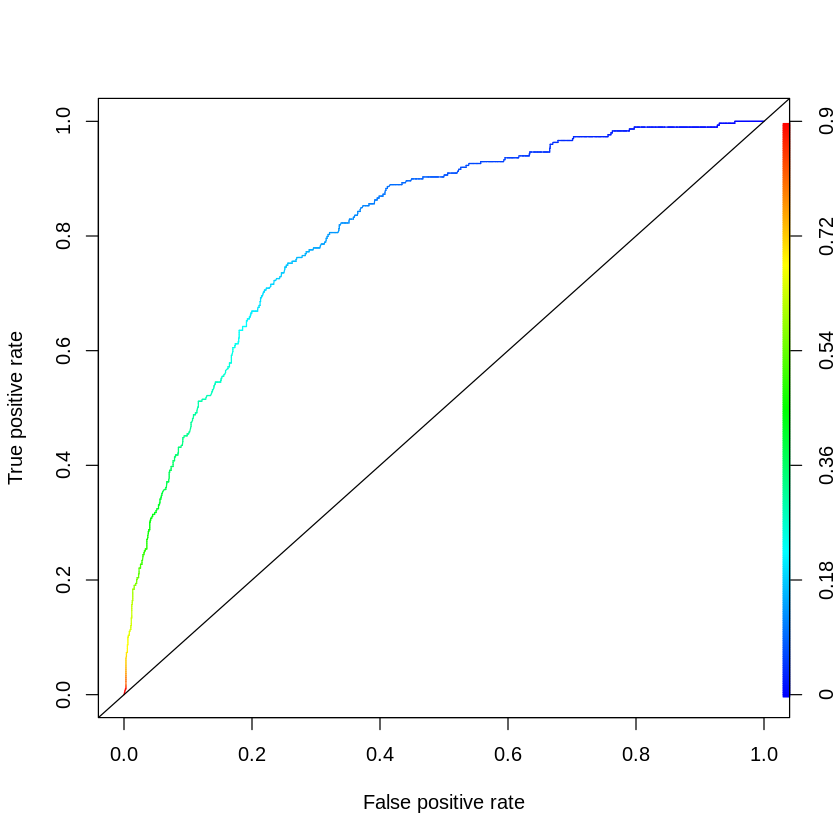

In [102]:
ROCR_predictions2 = prediction(df1_predicted2, df1_test$match)

perf2 <- performance(ROCR_predictions2,"tpr","fpr")

plot(perf2,colorize=TRUE)
abline(0,1)
as.numeric(performance(ROCR_predictions2,"auc")@y.values)

# Model 3

In [103]:
lm_train3=glm(match ~ funny_o+sports+tvsports , data= df1_train,family=binomial) 
summary(lm_train3)


Call:
glm(formula = match ~ funny_o + sports + tvsports, family = binomial, 
    data = df1_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3077  -0.6213  -0.4892  -0.3085   2.8251  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.803229   0.214386 -22.405   <2e-16 ***
funny_o      0.472222   0.025767  18.326   <2e-16 ***
sports      -0.005903   0.017775  -0.332    0.740    
tvsports    -0.008574   0.016783  -0.511    0.609    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4388.6  on 4849  degrees of freedom
Residual deviance: 3980.2  on 4846  degrees of freedom
AIC: 3988.2

Number of Fisher Scoring iterations: 5


# Model 4

In [104]:
lm_train41=glm(match ~ qualites_p+like , data= df1_train,family=binomial) 
summary(lm_train41)


Call:
glm(formula = match ~ qualites_p + like, family = binomial, data = df1_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2966  -0.5894  -0.4725  -0.2525   2.8460  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.98033    0.21539 -23.122  < 2e-16 ***
qualites_p   0.51625    0.09549   5.406 6.44e-08 ***
like         0.47400    0.03274  14.478  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4388.6  on 4849  degrees of freedom
Residual deviance: 3851.0  on 4847  degrees of freedom
AIC: 3857

Number of Fisher Scoring iterations: 5


In [105]:
lm_train42=glm(match ~ attractive_o+sports , data= df1_train,family=binomial) 
summary(lm_train42)


Call:
glm(formula = match ~ attractive_o + sports, family = binomial, 
    data = df1_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1694  -0.6393  -0.5048  -0.2929   2.7417  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.40224    0.19628 -22.428   <2e-16 ***
attractive_o  0.44071    0.02454  17.958   <2e-16 ***
sports       -0.02379    0.01536  -1.549    0.121    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4388.6  on 4849  degrees of freedom
Residual deviance: 4006.9  on 4847  degrees of freedom
AIC: 4012.9

Number of Fisher Scoring iterations: 5


In [106]:
lm_train43=glm(match ~ decision_o , data= df1_train,family=binomial) 
summary(lm_train43)


Call:
glm(formula = match ~ decision_o, family = binomial, data = df1_train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.99341  -0.99341  -0.00005  -0.00005   1.37329  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -20.57     337.49  -0.061    0.951
decision_o     20.12     337.49   0.060    0.952

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4388.6  on 4849  degrees of freedom
Residual deviance: 2794.4  on 4848  degrees of freedom
AIC: 2798.4

Number of Fisher Scoring iterations: 19


In [107]:
lm_train44=glm(match ~ like , data= df1_train,family=binomial) 
summary(lm_train44)


Call:
glm(formula = match ~ like, family = binomial, data = df1_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2979  -0.6572  -0.5063  -0.2220   3.1092  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.39274    0.20564  -26.22   <2e-16 ***
like         0.56716    0.02837   19.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4388.6  on 4849  degrees of freedom
Residual deviance: 3880.2  on 4848  degrees of freedom
AIC: 3884.2

Number of Fisher Scoring iterations: 5


In [108]:
lm_train45=glm(match ~ qualites_p , data= df1_train,family=binomial) 
summary(lm_train45)


Call:
glm(formula = match ~ qualites_p, family = binomial, data = df1_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8605  -0.4669  -0.4669  -0.4669   2.1309  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.16138    0.05693  -37.96   <2e-16 ***
qualites_p   1.35852    0.07951   17.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4388.6  on 4849  degrees of freedom
Residual deviance: 4092.6  on 4848  degrees of freedom
AIC: 4096.6

Number of Fisher Scoring iterations: 4
